# Credit EDA Assignment

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd

### Loading the dataset application_data.csv

In [3]:
app= pd.read_csv("application_data.csv")
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Cleaning

### Handling missing values

In [4]:
# Computing missing value percentage in each column
pd.set_option('display.max_rows', None) 
cols=(app.isna().sum()/len(app))*100
cols

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [5]:
# Filtering columns with missing value percentage greater than 30%
missingval=cols[cols>30]
missingval=missingval.index

In [6]:
## Removing columns with missing values greater than 30%

app=app.drop(missingval, axis=1)


In [7]:
## Checking the missing values in remaining columns
(app.isna().sum()/len(app))*100


SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [8]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
## Removing unnecessary columns
app=app.drop(["REGION_RATING_CLIENT_W_CITY", "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", 
              "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", 
              "DAYS_LAST_PHONE_CHANGE","AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"], axis=1)
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


In [10]:
pd.reset_option("display.max_rows")
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


In [11]:
## Computing value counts of each column
for col in app.columns:
    print(f"--------------------{col}--------------------")
    print(app[col].value_counts())

--------------------SK_ID_CURR--------------------
SK_ID_CURR
456255    1
100002    1
100003    1
100004    1
100006    1
         ..
100015    1
100014    1
100012    1
100011    1
100010    1
Name: count, Length: 307511, dtype: int64
--------------------TARGET--------------------
TARGET
0    282686
1     24825
Name: count, dtype: int64
--------------------NAME_CONTRACT_TYPE--------------------
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
--------------------CODE_GENDER--------------------
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
--------------------FLAG_OWN_CAR--------------------
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
--------------------FLAG_OWN_REALTY--------------------
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
--------------------CNT_CHILDREN--------------------
CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5  

In [12]:
### Dropping columns with almost same values (99% of vales are same)
app=app.drop(["FLAG_DOCUMENT_2", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5",  "FLAG_DOCUMENT_7",  "FLAG_DOCUMENT_9",
     "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17",
     "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", "FLAG_MOBIL", "FLAG_CONT_MOBILE", ], axis=1)


In [13]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1,0,1.0,2,Business Entity Type 3,0.262949,0.139376,1,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,0,2.0,1,School,0.622246,NaN,1,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1,0,1.0,2,Government,0.555912,0.729567,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,2.0,2,Business Entity Type 3,0.650442,NaN,1,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,1.0,2,Religion,0.322738,NaN,0,0,1


### Handling negative values in columns 

In [14]:
## Replacing days of birth with age i.e. year_birth
app["YEARS_BIRTH"]=app["DAYS_BIRTH"].apply(lambda x: int(-x/360) if x<0 else (x/360))
app=app.drop(["DAYS_BIRTH"], axis=1)

In [15]:
app["YEARS_BIRTH"]

0         26
1         46
2         52
3         52
4         55
          ..
307506    25
307507    57
307508    41
307509    33
307510    46
Name: YEARS_BIRTH, Length: 307511, dtype: int64

In [16]:
app["DAYS_EMPLOYED"].value_counts()


DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-11471         1
-12878         1
-10573         1
-12990         1
-14184         1
Name: count, Length: 12574, dtype: int64

In [17]:
# Converting the outlier in DAYS_EMPLOYED as np.nan
app["DAYS_EMPLOYED"]=app["DAYS_EMPLOYED"].apply(lambda x : np.nan if x==365243 else x)

In [18]:
app["DAYS_EMPLOYED"].isna().sum()/len(app["DAYS_EMPLOYED"])

np.float64(0.18007160719453938)

In [19]:
# Converting the days into years
app["YEARS_EMPLOYED"]=app["DAYS_EMPLOYED"].apply(lambda x: int(-x/360) if x<0 and pd.notnull(x) else (int(x/360) if pd.notnull(x) else np.nan))
app=app.drop(["DAYS_EMPLOYED"], axis=1)

In [20]:
app["YEARS_EMPLOYED"].value_counts()

YEARS_EMPLOYED
1.0     31417
2.0     29326
0.0     27503
3.0     24942
4.0     21674
5.0     16401
6.0     14954
7.0     13076
8.0     11578
9.0      9065
10.0     7531
11.0     6007
12.0     5368
14.0     4620
13.0     4379
15.0     3122
16.0     2318
17.0     2065
18.0     1890
19.0     1822
20.0     1716
21.0     1477
22.0     1318
23.0     1059
24.0      922
25.0      866
26.0      666
27.0      643
28.0      634
29.0      573
30.0      483
31.0      431
32.0      384
34.0      351
33.0      345
35.0      297
36.0      206
37.0      171
38.0      130
39.0      118
40.0       84
41.0       65
42.0       44
43.0       31
45.0       29
44.0       21
46.0        8
48.0        4
47.0        2
49.0        1
Name: count, dtype: int64

In [21]:
app["YEARS_EMPLOYED"].describe()

count    252137.000000
mean          6.127312
std           6.499801
min           0.000000
25%           2.000000
50%           4.000000
75%           8.000000
max          49.000000
Name: YEARS_EMPLOYED, dtype: float64

In [22]:
## Imputing missing values with median
app["YEARS_EMPLOYED"]=app["YEARS_EMPLOYED"].fillna(app["YEARS_EMPLOYED"].median())

In [23]:
app["DAYS_REGISTRATION"].value_counts()

DAYS_REGISTRATION
-1.0        113
-7.0         98
-6.0         96
-4.0         92
-2.0         92
           ... 
-15106.0      1
-13896.0      1
-15320.0      1
-14252.0      1
-17588.0      1
Name: count, Length: 15688, dtype: int64

In [24]:
## Converting -ve values into +ve values and days into years
app["YEARS_REGISTRATION"]=app["DAYS_REGISTRATION"].apply(lambda x : int(-x/360) if x<0 else int(x/360))

In [25]:
app["YEARS_REGISTRATION"].value_counts()

YEARS_REGISTRATION
0     16623
1     15340
2     14892
3     12894
12    12667
      ...  
62        2
65        2
60        2
61        1
68        1
Name: count, Length: 66, dtype: int64

In [26]:
app["DAYS_ID_PUBLISH"].value_counts()

DAYS_ID_PUBLISH
-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
        ... 
-6151      1
-6233      1
-6148      1
-6383      1
-6211      1
Name: count, Length: 6168, dtype: int64

In [27]:
## Converting -ve values into +ve values and days into years

app["YEARS_ID_PUBLISH"]=app["DAYS_ID_PUBLISH"].apply(lambda x : int(-x/360) if x<0 else int(x/360))

In [28]:
app["YEARS_ID_PUBLISH"].value_counts()

YEARS_ID_PUBLISH
11    42911
12    39778
13    23764
9     19159
7     19104
8     18404
10    18008
6     17954
2     17078
5     16948
3     16933
4     16324
1     15591
0     14672
14     7399
15     2361
16     1008
17      113
19        1
18        1
Name: count, dtype: int64

In [29]:
# Dropping the old columns with values in days
app=app.drop(["DAYS_ID_PUBLISH","DAYS_REGISTRATION"], axis=1)

In [30]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Business Entity Type 3,0.262949,0.139376,1,0,0,26,1.0,10,5
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,School,0.622246,NaN,1,0,0,46,3.0,3,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Government,0.555912,0.729567,0,0,0,52,0.0,11,7
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Business Entity Type 3,0.650442,NaN,1,0,0,52,8.0,27,6
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Religion,0.322738,NaN,0,0,1,55,8.0,11,9


In [31]:
pd.set_option("display.max_columns", None)
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,0,1,0,1.0,2,Business Entity Type 3,0.262949,0.139376,1,0,0,26,1.0,10,5
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,0,1,0,2.0,1,School,0.622246,NaN,1,0,0,46,3.0,3,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,0,1.0,2,Government,0.555912,0.729567,0,0,0,52,0.0,11,7
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,0,0,0,2.0,2,Business Entity Type 3,0.650442,NaN,1,0,0,52,8.0,27,6
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,0,0,0,1.0,2,Religion,0.322738,NaN,0,0,1,55,8.0,11,9


In [32]:
## Checking missing values in the columns
(app.isna().sum()/len(app))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000
CNT_FAM_MEMBERS                0.000650
REGION_RATING_CLIENT           0.000000
ORGANIZATION_TYPE              0.000000
EXT_SOURCE_2                   0.214626


In [33]:
app["AMT_ANNUITY"].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [34]:
# Imputing missing value with median
app["AMT_ANNUITY"]=app["AMT_ANNUITY"].fillna(app["AMT_ANNUITY"].median())

In [35]:
app["AMT_GOODS_PRICE"].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [36]:
# As "AMT_GOODS_PRICE" is a numerical column, we'll impute the missing values with median of the column

app["AMT_GOODS_PRICE"]=app["AMT_GOODS_PRICE"].fillna(app["AMT_GOODS_PRICE"].median())

In [37]:
app["NAME_TYPE_SUITE"].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [38]:
# As "NAME_TYPE_SUITE" is a categorical column, we'll impute the missing values as mode of the column
app["NAME_TYPE_SUITE"]=app["NAME_TYPE_SUITE"].fillna(app["NAME_TYPE_SUITE"].mode()[0])

In [39]:
app["EXT_SOURCE_2"].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [40]:
# As "EXT_SOURCE_2" is a numerical column, we'll impute the missing values with median of the column

app["EXT_SOURCE_2"]=app["EXT_SOURCE_2"].fillna(app["EXT_SOURCE_2"].median())

In [41]:
app["EXT_SOURCE_3"].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [42]:
# As "EXT_SOURCE_3" is a numerical column, we'll impute the missing values with median of the column

app["EXT_SOURCE_3"]=app["EXT_SOURCE_3"].fillna(app["EXT_SOURCE_3"].median())

In [43]:
app["CNT_FAM_MEMBERS"].value_counts()

CNT_FAM_MEMBERS
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

In [44]:
# As "CNT_FAM_MEMBERS" is a categorical column, we'll impute the missing values as mode of the column

app["CNT_FAM_MEMBERS"]=app["CNT_FAM_MEMBERS"].fillna(app["CNT_FAM_MEMBERS"].mode()[0])

In [45]:
(app.isna().sum()/len(app))*100

SK_ID_CURR                    0.0
TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
FLAG_OWN_REALTY               0.0
CNT_CHILDREN                  0.0
AMT_INCOME_TOTAL              0.0
AMT_CREDIT                    0.0
AMT_ANNUITY                   0.0
AMT_GOODS_PRICE               0.0
NAME_TYPE_SUITE               0.0
NAME_INCOME_TYPE              0.0
NAME_EDUCATION_TYPE           0.0
NAME_FAMILY_STATUS            0.0
NAME_HOUSING_TYPE             0.0
REGION_POPULATION_RELATIVE    0.0
FLAG_EMP_PHONE                0.0
FLAG_WORK_PHONE               0.0
FLAG_PHONE                    0.0
FLAG_EMAIL                    0.0
CNT_FAM_MEMBERS               0.0
REGION_RATING_CLIENT          0.0
ORGANIZATION_TYPE             0.0
EXT_SOURCE_2                  0.0
EXT_SOURCE_3                  0.0
FLAG_DOCUMENT_3               0.0
FLAG_DOCUMENT_6               0.0
FLAG_DOCUMENT_8               0.0
YEARS_BIRTH   

#### Handling "XNA" values in CODE_GENDER column

In [46]:
app["CODE_GENDER"].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [47]:
mode=app["CODE_GENDER"].mode()[0]

In [48]:
app["CODE_GENDER"]=app["CODE_GENDER"].apply(lambda x: mode if x== "XNA" else x)

In [49]:
app["CODE_GENDER"].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8',
       'YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION',
       'YEARS_ID_PUBLISH'],
      dtype='object')

In [52]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,0,1,0,1.0,2,Business Entity Type 3,0.262949,0.139376,1,0,0,26,1.0,10,5
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,0,1,0,2.0,1,School,0.622246,0.535276,1,0,0,46,3.0,3,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,0,1.0,2,Government,0.555912,0.729567,0,0,0,52,0.0,11,7
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,0,0,0,2.0,2,Business Entity Type 3,0.650442,0.535276,1,0,0,52,8.0,27,6
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,0,0,0,1.0,2,Religion,0.322738,0.535276,0,0,1,55,8.0,11,9


### Exploratory Data Analysis
### Univariate Analysis

In [53]:
num_cols=["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "EXT_SOURCE_2", "EXT_SOURCE_3","YEARS_BIRTH", "YEARS_EMPLOYED","YEARS_REGISTRATION", "YEARS_ID_PUBLISH"]

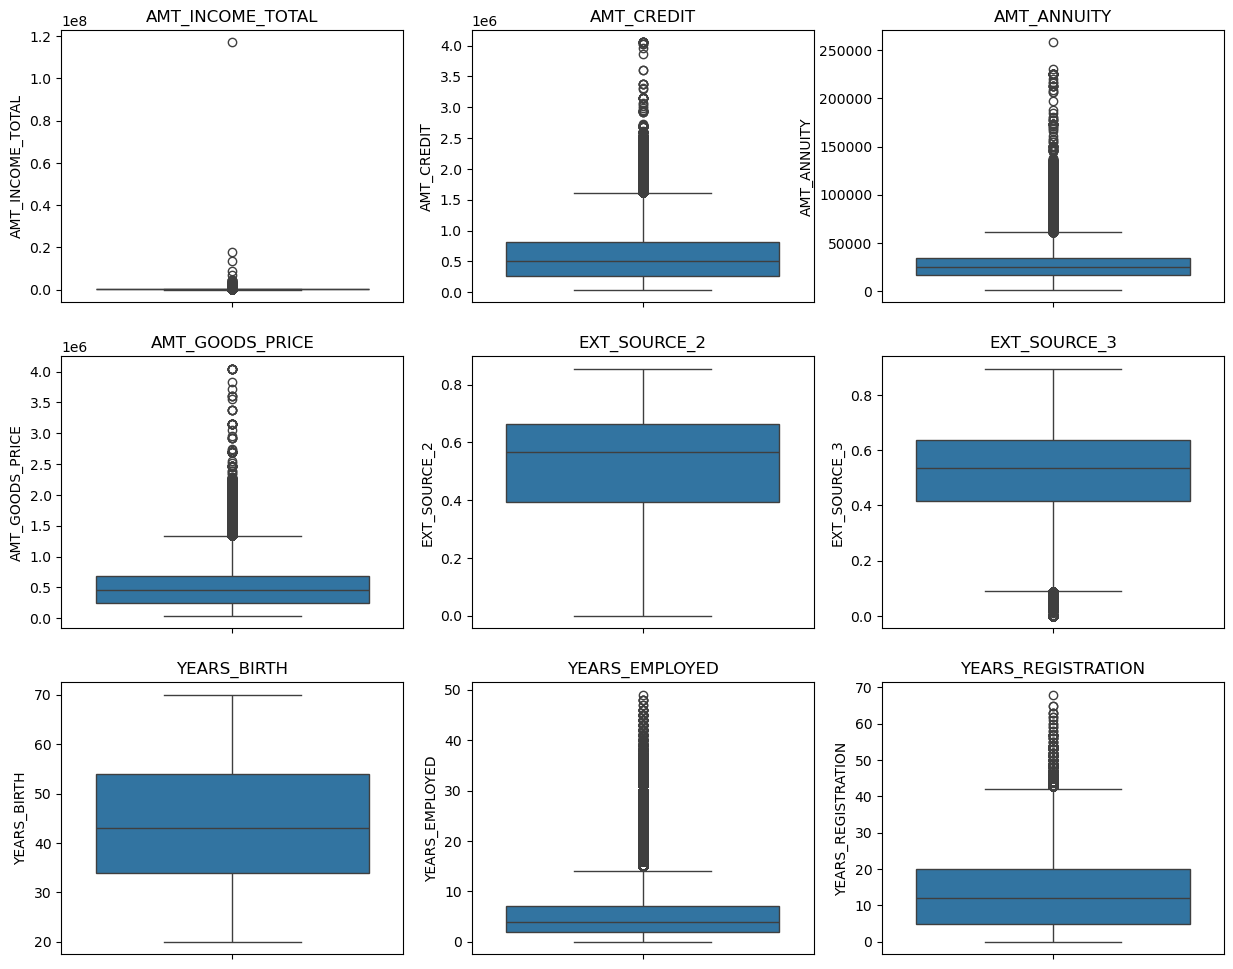

In [54]:
plt.figure(figsize=(15,12))

plt.subplot(3,3,1)
sns.boxplot(y=app["AMT_INCOME_TOTAL"])
plt.title("AMT_INCOME_TOTAL")


plt.subplot(3,3,2)
sns.boxplot(y=app["AMT_CREDIT"])
plt.title("AMT_CREDIT")



plt.subplot(3,3,3)
sns.boxplot(y=app["AMT_ANNUITY"])
plt.title("AMT_ANNUITY")


plt.subplot(3,3,4)
sns.boxplot(y=app["AMT_GOODS_PRICE"])
plt.title("AMT_GOODS_PRICE")



plt.subplot(3,3,5)
sns.boxplot(y=app["EXT_SOURCE_2"])
plt.title("EXT_SOURCE_2")



plt.subplot(3,3,6)
sns.boxplot(y=app["EXT_SOURCE_3"])
plt.title("EXT_SOURCE_3")



plt.subplot(3,3,7)
sns.boxplot(y=app["YEARS_BIRTH"])
plt.title("YEARS_BIRTH")



plt.subplot(3,3,8)
sns.boxplot(y=app["YEARS_EMPLOYED"])
plt.title("YEARS_EMPLOYED")



plt.subplot(3,3,9)
sns.boxplot(y=app["YEARS_REGISTRATION"])
plt.title("YEARS_REGISTRATION")

plt.show()

##### AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE have outliers.
##### YEARS_EMPLOYED, YEARS_REGISTRATION have outliers.

### Handling Outliers

In [55]:
## Capping outliers ith values lower than Q1-1.5*IQR and higher than Q3+1.5*IQR
cols=["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE","EXT_SOURCE_3", "YEARS_EMPLOYED", "YEARS_REGISTRATION"]
for col in cols:
        Q1 = app[col].quantile(0.25)
        Q3 = app[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        
        # Clip outliers using pandas clip()
        app[col] = app[col].clip(lower=lower, upper=upper)

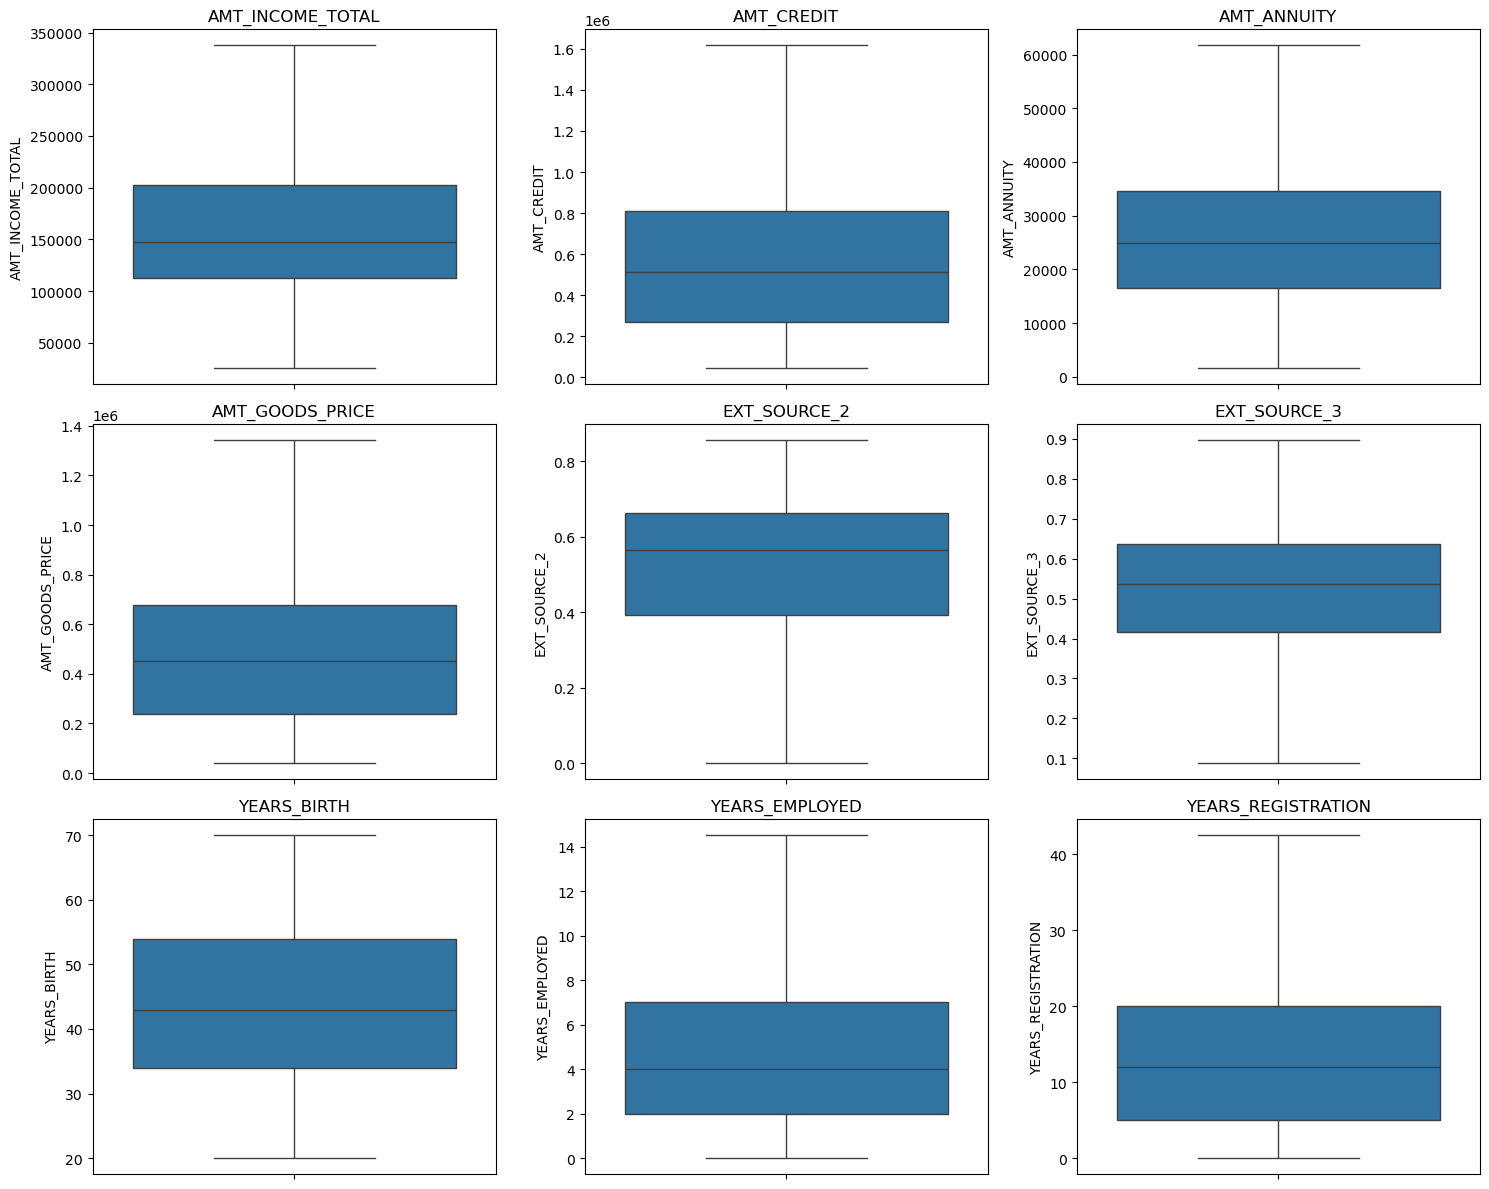

In [56]:
plt.figure(figsize=(15,12))

plt.subplot(3,3,1)
sns.boxplot(y=app["AMT_INCOME_TOTAL"])
plt.title("AMT_INCOME_TOTAL")


plt.subplot(3,3,2)
sns.boxplot(y=app["AMT_CREDIT"])
plt.title("AMT_CREDIT")



plt.subplot(3,3,3)
sns.boxplot(y=app["AMT_ANNUITY"])
plt.title("AMT_ANNUITY")


plt.subplot(3,3,4)
sns.boxplot(y=app["AMT_GOODS_PRICE"])
plt.title("AMT_GOODS_PRICE")



plt.subplot(3,3,5)
sns.boxplot(y=app["EXT_SOURCE_2"])
plt.title("EXT_SOURCE_2")



plt.subplot(3,3,6)
sns.boxplot(y=app["EXT_SOURCE_3"])
plt.title("EXT_SOURCE_3")



plt.subplot(3,3,7)
sns.boxplot(y=app["YEARS_BIRTH"])
plt.title("YEARS_BIRTH")



plt.subplot(3,3,8)
sns.boxplot(y=app["YEARS_EMPLOYED"])
plt.title("YEARS_EMPLOYED")



plt.subplot(3,3,9)
sns.boxplot(y=app["YEARS_REGISTRATION"])
plt.title("YEARS_REGISTRATION")

plt.tight_layout()
plt.show()

In [57]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,0,1,0,1.0,2,Business Entity Type 3,0.262949,0.139376,1,0,0,26,1.0,10.0,5
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,0,1,0,2.0,1,School,0.622246,0.535276,1,0,0,46,3.0,3.0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,0,1.0,2,Government,0.555912,0.729567,0,0,0,52,0.0,11.0,7
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,0,0,0,2.0,2,Business Entity Type 3,0.650442,0.535276,1,0,0,52,8.0,27.0,6
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,0,0,0,1.0,2,Religion,0.322738,0.535276,0,0,1,55,8.0,11.0,9


In [58]:
cat_cols=["NAME_CONTRACT_TYPE", "CODE_GENDER", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE","ORGANIZATION_TYPE"] 

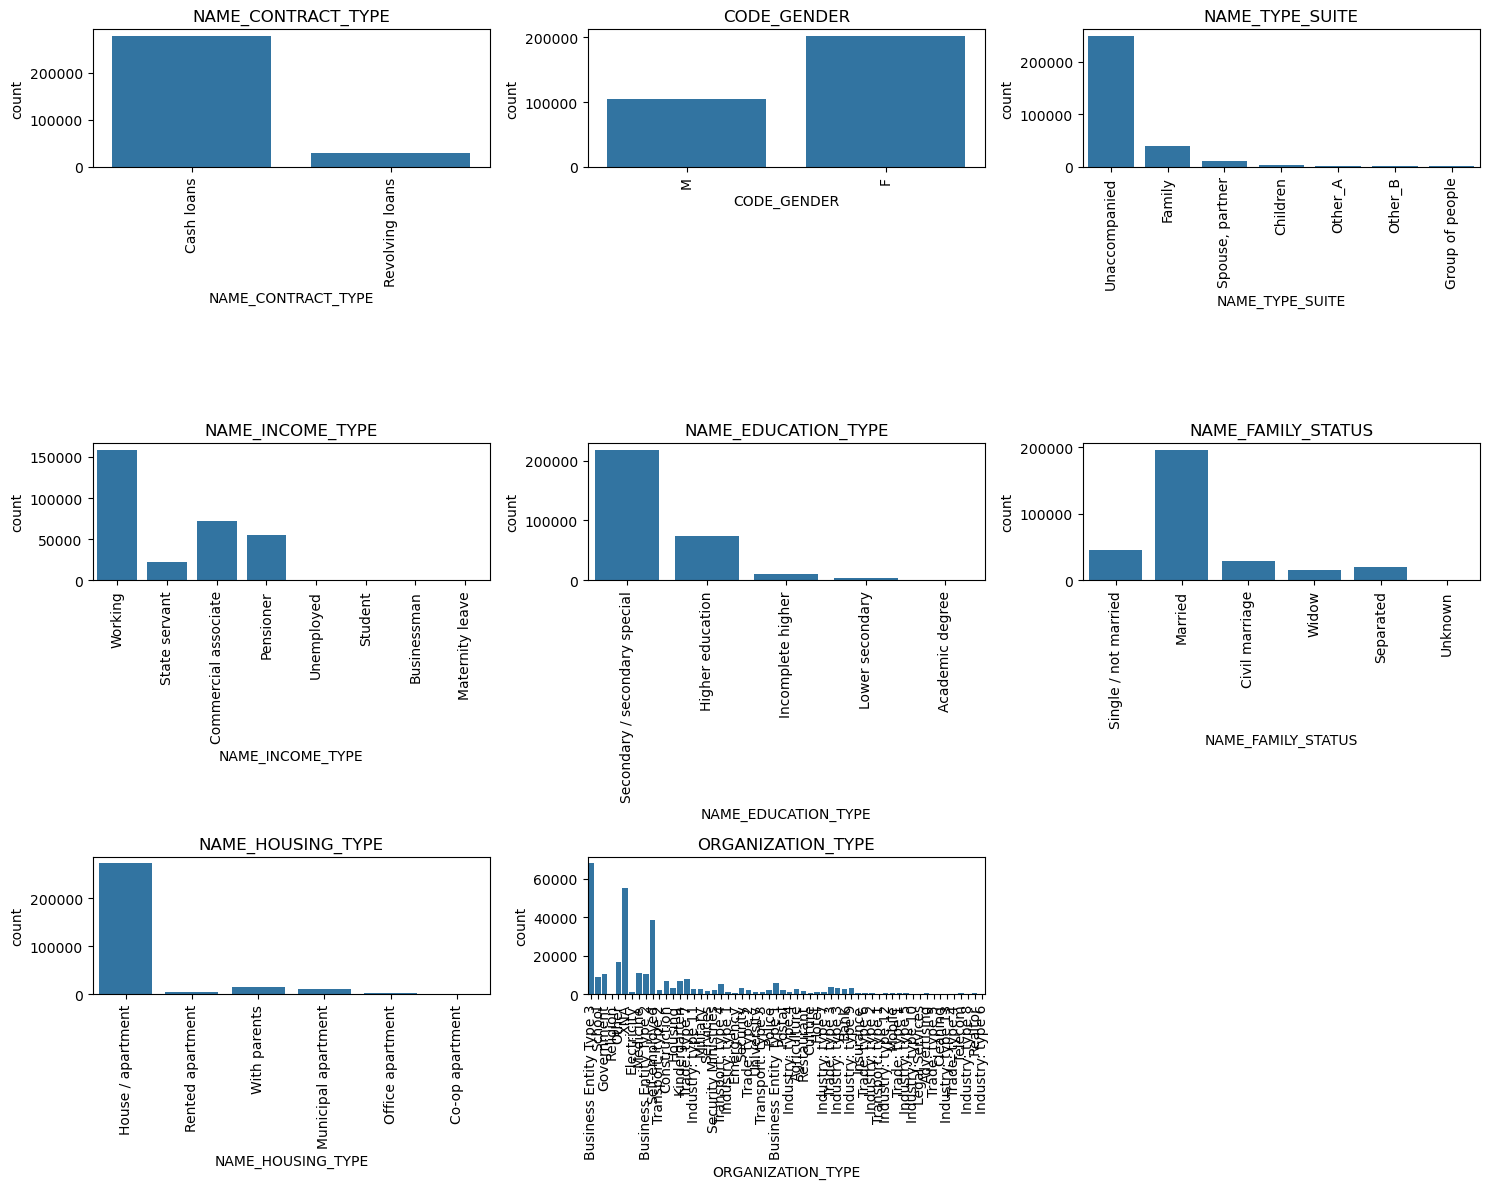

In [59]:
plt.figure(figsize=(15,12))

plt.subplot(3,3,1)
sns.countplot(x="NAME_CONTRACT_TYPE", data=app)
plt.title("NAME_CONTRACT_TYPE")
plt.xticks(rotation=90)   # rotate labels 45 degrees


plt.subplot(3,3,2)
sns.countplot(x="CODE_GENDER", data=app)
plt.title("CODE_GENDER")
plt.xticks(rotation=90)   # rotate labels 45 degrees



plt.subplot(3,3,3)
sns.countplot(x="NAME_TYPE_SUITE", data=app)
plt.title("NAME_TYPE_SUITE")
plt.xticks(rotation=90)   # rotate labels 45 degrees


plt.subplot(3,3,4)
sns.countplot(x="NAME_INCOME_TYPE", data=app)
plt.title("NAME_INCOME_TYPE")
plt.xticks(rotation=90)   # rotate labels 45 degrees



plt.subplot(3,3,5)
sns.countplot(x="NAME_EDUCATION_TYPE", data=app)
plt.title("NAME_EDUCATION_TYPE")
plt.xticks(rotation=90)   # rotate labels 45 degrees



plt.subplot(3,3,6)
sns.countplot(x="NAME_FAMILY_STATUS", data=app)
plt.title("NAME_FAMILY_STATUS")
plt.xticks(rotation=90)   # rotate labels 45 degrees



plt.subplot(3,3,7)
sns.countplot(x="NAME_HOUSING_TYPE", data=app)
plt.title("NAME_HOUSING_TYPE")
plt.xticks(rotation=90)   # rotate labels 45 degrees



plt.subplot(3,3,8)
sns.countplot(x="ORGANIZATION_TYPE", data=app)
plt.title("ORGANIZATION_TYPE")
plt.xticks(rotation=90)   # rotate labels 90 degrees



plt.xticks(rotation=90)   # rotate labels 90 degrees
plt.tight_layout()
plt.show()

##### More applicants have applied for Cash loans than revolving loans
##### Most of the applicants are female
##### Most applicants are working professionals.
##### Most applicants are married
##### Most applicants have a house/apartment.

### Bivariate Analysis

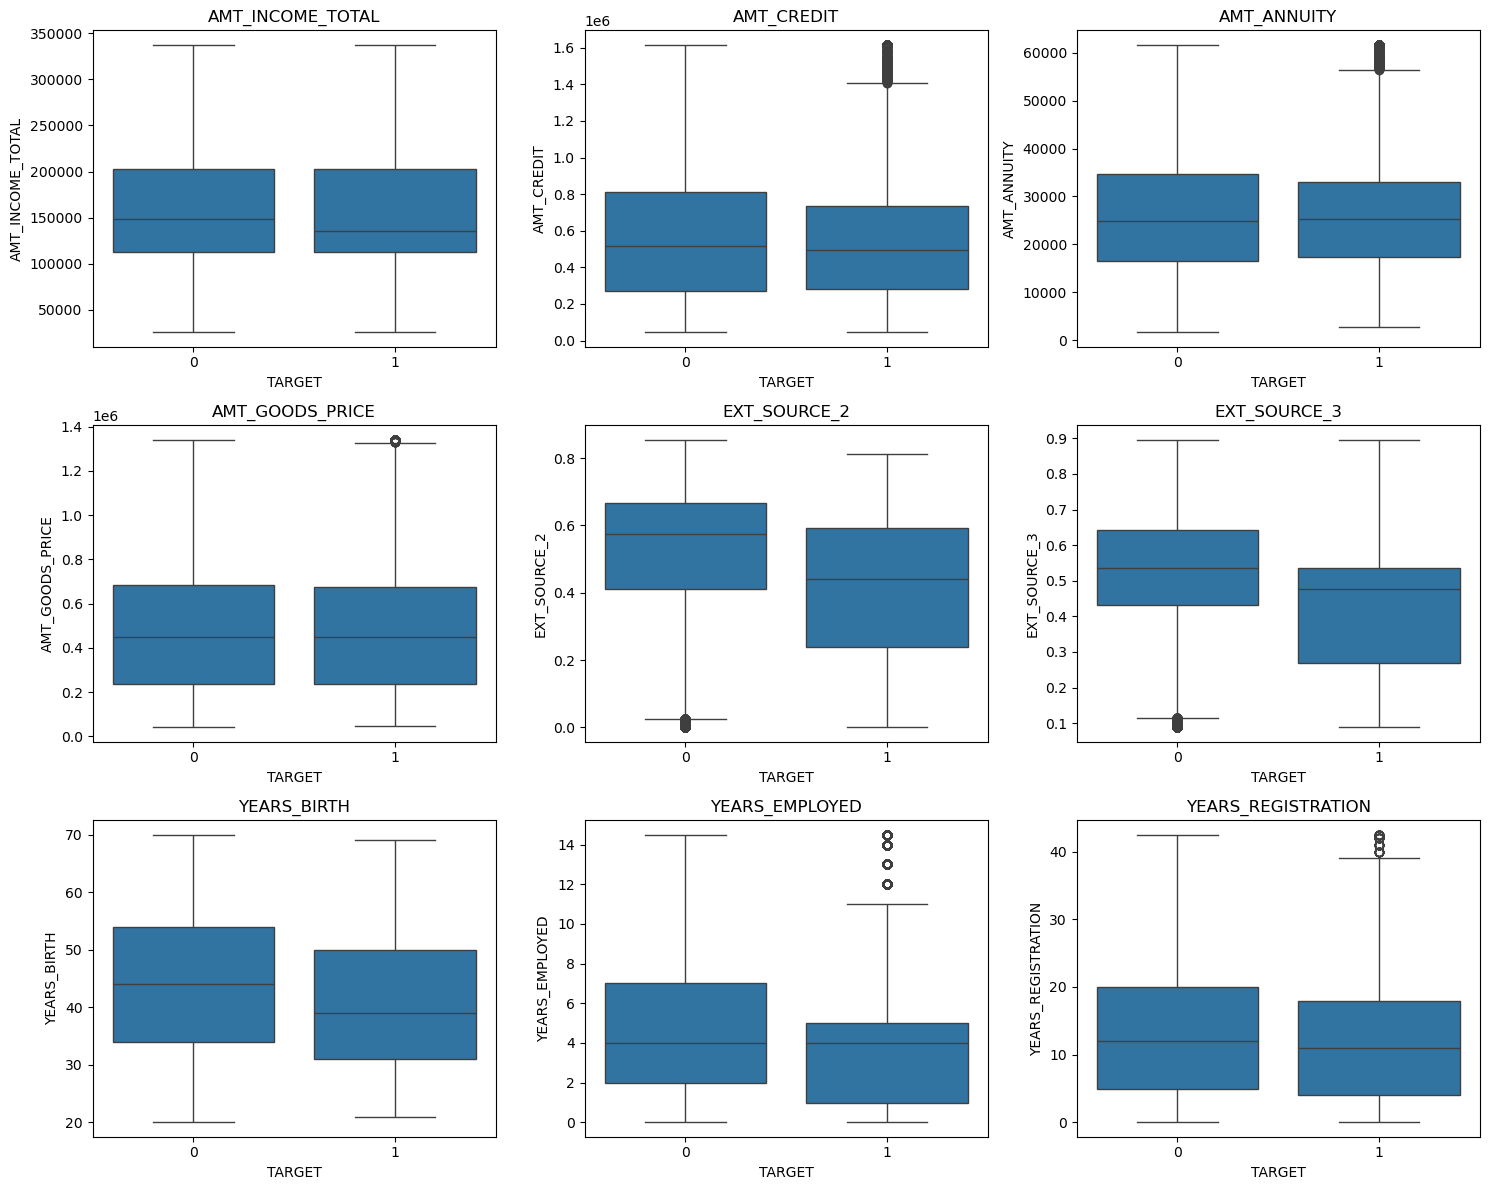

In [60]:
plt.figure(figsize=(15,12))

plt.subplot(3,3,1)
sns.boxplot(y=app["AMT_INCOME_TOTAL"], x=app["TARGET"])
plt.title("AMT_INCOME_TOTAL")


plt.subplot(3,3,2)
sns.boxplot(y=app["AMT_CREDIT"], x=app["TARGET"])
plt.title("AMT_CREDIT")



plt.subplot(3,3,3)
sns.boxplot(y=app["AMT_ANNUITY"], x=app["TARGET"])
plt.title("AMT_ANNUITY")


plt.subplot(3,3,4)
sns.boxplot(y=app["AMT_GOODS_PRICE"], x=app["TARGET"])
plt.title("AMT_GOODS_PRICE")



plt.subplot(3,3,5)
sns.boxplot(y=app["EXT_SOURCE_2"], x=app["TARGET"])
plt.title("EXT_SOURCE_2")



plt.subplot(3,3,6)
sns.boxplot(y=app["EXT_SOURCE_3"], x=app["TARGET"])
plt.title("EXT_SOURCE_3")



plt.subplot(3,3,7)
sns.boxplot(y=app["YEARS_BIRTH"], x=app["TARGET"])
plt.title("YEARS_BIRTH")



plt.subplot(3,3,8)
sns.boxplot(y=app["YEARS_EMPLOYED"], x=app["TARGET"])
plt.title("YEARS_EMPLOYED")



plt.subplot(3,3,9)
sns.boxplot(y=app["YEARS_REGISTRATION"], x=app["TARGET"])
plt.title("YEARS_REGISTRATION")

plt.tight_layout()
plt.show()

##### Applicants with 0 defaults(TARGET=0) have higher score from EXT_SOURCE_2 and EXT_SOURCE_3
##### Median age of non-defaulters(TARGET=0) is higher compared to defaulters(TARGET=1)

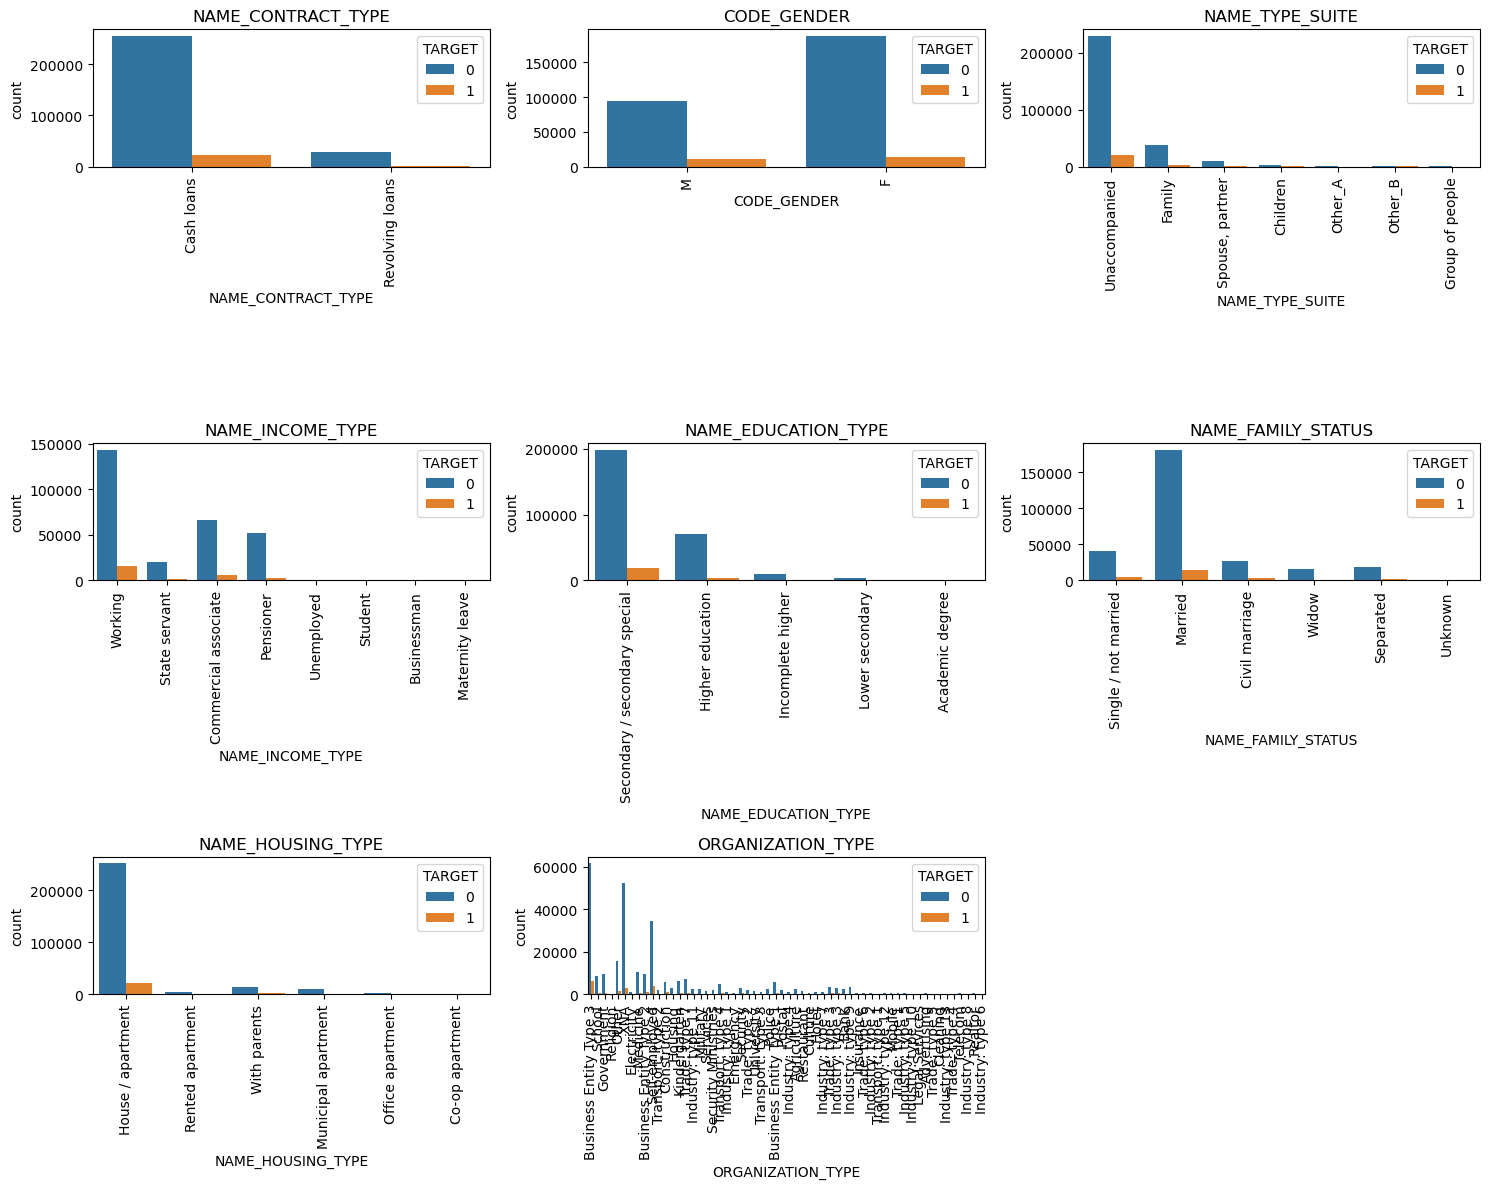

In [61]:
plt.figure(figsize=(15,12))

plt.subplot(3,3,1)
sns.countplot(x="NAME_CONTRACT_TYPE", hue="TARGET", data=app)
plt.title("NAME_CONTRACT_TYPE")
plt.xticks(rotation=90)   # rotate labels 90 degrees


plt.subplot(3,3,2)
sns.countplot(x="CODE_GENDER", hue="TARGET",data=app)
plt.title("CODE_GENDER")
plt.xticks(rotation=90)   # rotate labels 90 degrees



plt.subplot(3,3,3)
sns.countplot(x="NAME_TYPE_SUITE", hue="TARGET",data=app)
plt.title("NAME_TYPE_SUITE")
plt.xticks(rotation=90)   # rotate labels 90 degrees


plt.subplot(3,3,4)
sns.countplot(x="NAME_INCOME_TYPE",hue="TARGET", data=app)
plt.title("NAME_INCOME_TYPE")
plt.xticks(rotation=90)   # rotate labels 90 degrees



plt.subplot(3,3,5)
sns.countplot(x="NAME_EDUCATION_TYPE",hue="TARGET", data=app)
plt.title("NAME_EDUCATION_TYPE")
plt.xticks(rotation=90)   # rotate labels 90 degrees



plt.subplot(3,3,6)
sns.countplot(x="NAME_FAMILY_STATUS",hue="TARGET", data=app)
plt.title("NAME_FAMILY_STATUS")
plt.xticks(rotation=90)   # rotate labels 90 degrees



plt.subplot(3,3,7)
sns.countplot(x="NAME_HOUSING_TYPE",hue="TARGET", data=app)
plt.title("NAME_HOUSING_TYPE")
plt.xticks(rotation=90)   # rotate labels 90 degrees



plt.subplot(3,3,8)
sns.countplot(x="ORGANIZATION_TYPE",hue="TARGET", data=app)
plt.title("ORGANIZATION_TYPE")
plt.xticks(rotation=90)   # rotate labels 90 degrees



plt.xticks(rotation=90)   # rotate labels 90 degrees
plt.tight_layout()
plt.show()

In [145]:
# Computing correlation between numerical variables
correlation=app.corr(numeric_only=True)
corr_abs = round(correlation.abs(),2)
corr_pairs = (
    corr_abs.unstack()
    .sort_values(key=abs, ascending=False)
    .drop_duplicates()
)

corr_pairs.head(10)

YEARS_ID_PUBLISH      YEARS_ID_PUBLISH              1.00
AMT_GOODS_PRICE       AMT_CREDIT                    0.99
CNT_CHILDREN          CNT_FAM_MEMBERS               0.88
AMT_CREDIT            AMT_ANNUITY                   0.79
FLAG_EMP_PHONE        YEARS_BIRTH                   0.62
                      FLAG_DOCUMENT_6               0.60
REGION_RATING_CLIENT  REGION_POPULATION_RELATIVE    0.53
FLAG_DOCUMENT_3       FLAG_DOCUMENT_6               0.49
                      FLAG_DOCUMENT_8               0.47
AMT_INCOME_TOTAL      AMT_CREDIT                    0.41
dtype: float64

<Axes: >

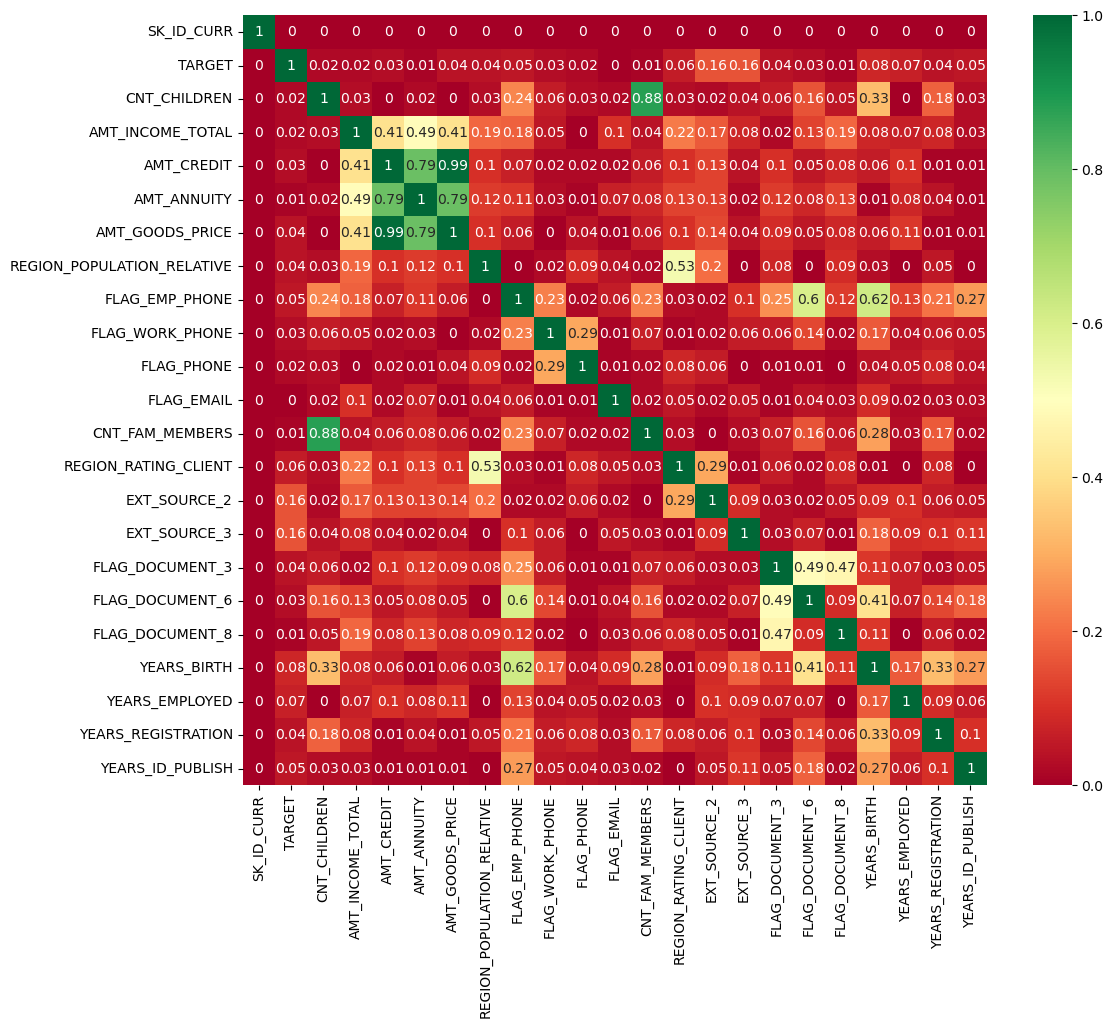

In [146]:
## Plotting heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_abs, cmap="RdYlGn", annot=True)

##### AMT_GOODS_PRICE had a high correlation with AMT_CREDIT (0.98)
##### CNT_CHILDREN has a high correlation with CNT_FAM_MEMBERS (0.87)
##### AMT_ANNUITY had a high correlation with AMT_CREDIT (0.79)
##### AMT_ANNUITY had a high correlation with AMT_GOODS_PRICE (0.79)

## Loading the file previous_application

In [120]:
prev_app= pd.read_csv("previous_application.csv")

In [121]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
prev_app.shape

(1670214, 37)

### Handling missing values in prev_app

In [123]:
## Computing missing value percentage of all the columns
missingcol=(prev_app.isna().sum()/len(prev_app))*100
missingcol

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [124]:
## Filtering columns with missing value percentage greater than 30%
missingcol30=missingcol[missingcol>30]
missingcol30=missingcol30.index

In [126]:
# Dropping columns with more than 30% missing values
prev_app=prev_app.drop(missingcol30, axis=1)

In [127]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [128]:
(prev_app.isna().sum()/len(prev_app))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [129]:
prev_app["AMT_ANNUITY"].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

### Handling duplicates in prev_app dataset

In [133]:
prev_app[prev_app.duplicated(subset=["SK_ID_CURR"])]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
23,1172937,302212,Cash loans,39475.305,1129500.0,1277104.5,1129500.0,THURSDAY,5,Y,1,XNA,Refused,-594,Cash through the bank,HC,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,54.0,low_normal,Cash X-Sell: low
115,2686051,101529,Cash loans,NaN,0.0,0.0,NaN,TUESDAY,9,Y,1,XNA,Canceled,-164,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
180,1630059,405785,Consumer loans,4550.535,28300.5,22617.0,28300.5,FRIDAY,10,Y,1,XAP,Approved,-2042,Cash through the bank,XAP,Repeater,Photo / Cinema Equipment,POS,XNA,Country-wide,41,Connectivity,6.0,high,POS mobile with interest
217,1129372,203250,Cash loans,31952.205,495000.0,553806.0,495000.0,THURSDAY,10,Y,1,XNA,Approved,-859,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,36.0,high,Cash X-Sell: high
262,2562544,163961,Cash loans,29527.200,270000.0,270000.0,270000.0,WEDNESDAY,12,Y,1,XNA,Approved,-2337,XNA,XAP,Refreshed,XNA,Cash,x-sell,Country-wide,-1,Consumer electronics,12.0,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,1,XAP,Approved,-544,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,1,XAP,Approved,-1694,Cash through the bank,XAP,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,1,XAP,Approved,-1488,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,1,XNA,Approved,-1185,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low


In [134]:
prev_app["SK_ID_CURR"].value_counts()

SK_ID_CURR
187868    77
265681    73
173680    72
242412    68
206783    67
          ..
353874     1
123460     1
364512     1
195648     1
168750     1
Name: count, Length: 338857, dtype: int64

##### Since, there are multiple entries for column SK_ID_CURR, we'll take groupby of column  "SK_ID_CURR", while aggregating the other columns

In [77]:
## Grouping by by column "SK_ID_CURR"
prev_app = prev_app.groupby("SK_ID_CURR").agg({
    "AMT_ANNUITY": "mean",
    "AMT_APPLICATION": "mean",
    "AMT_CREDIT": "mean",
    "AMT_GOODS_PRICE": "mean",
    "CNT_PAYMENT": "mean",
    
    "NAME_CONTRACT_TYPE": lambda x: x.mode()[0] if not x.mode().empty else None,
    "NAME_CONTRACT_STATUS": lambda x: x.mode()[0] if not x.mode().empty else None,
    "NAME_CLIENT_TYPE": lambda x: x.mode()[0] if not x.mode().empty else None

})


In [79]:
prev_app["AMT_ANNUITY"]= prev_app["AMT_ANNUITY"].apply(lambda x : int(x) if pd.notnull(x) else x)
prev_app["AMT_APPLICATION"]= prev_app["AMT_APPLICATION"].apply(lambda x : int(x) if pd.notnull(x) else x)
prev_app["AMT_CREDIT"]= prev_app["AMT_CREDIT"].apply(lambda x : int(x) if pd.notnull(x) else x)
prev_app["AMT_GOODS_PRICE"]= prev_app["AMT_GOODS_PRICE"].apply(lambda x : int(x) if pd.notnull(x) else x)
prev_app["CNT_PAYMENT"]= prev_app["CNT_PAYMENT"].apply(lambda x : int(x) if pd.notnull(x) else x)




In [80]:
prev_app.shape

(338857, 8)

In [81]:
(prev_app.isna().sum()/len(prev_app))*100

AMT_ANNUITY             0.141653
AMT_APPLICATION         0.000000
AMT_CREDIT              0.000000
AMT_GOODS_PRICE         0.313997
CNT_PAYMENT             0.141062
NAME_CONTRACT_TYPE      0.000000
NAME_CONTRACT_STATUS    0.000000
NAME_CLIENT_TYPE        0.000000
dtype: float64

In [82]:
prev_app["AMT_ANNUITY"]=prev_app["AMT_ANNUITY"].fillna(prev_app["AMT_ANNUITY"].median())

In [83]:
prev_app["AMT_GOODS_PRICE"]=prev_app["AMT_GOODS_PRICE"].fillna(prev_app["AMT_GOODS_PRICE"].median())

In [84]:
prev_app["CNT_PAYMENT"]=prev_app["CNT_PAYMENT"].fillna(prev_app["CNT_PAYMENT"].median())

In [85]:
(prev_app.isna().sum()/len(prev_app))*100

AMT_ANNUITY             0.0
AMT_APPLICATION         0.0
AMT_CREDIT              0.0
AMT_GOODS_PRICE         0.0
CNT_PAYMENT             0.0
NAME_CONTRACT_TYPE      0.0
NAME_CONTRACT_STATUS    0.0
NAME_CLIENT_TYPE        0.0
dtype: float64

In [86]:
prev_app.head()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT,NAME_CONTRACT_TYPE,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE
SK_ID_CURR,,,,,,,,
100001,3951.0,24835,23787,24835.0,8.0,Consumer loans,Approved,Refreshed
100002,9251.0,179055,179055,179055.0,24.0,Consumer loans,Approved,New
100003,56553.0,435436,484191,435436.0,10.0,Consumer loans,Approved,Refreshed
100004,5357.0,24282,20106,24282.0,4.0,Consumer loans,Approved,New
100005,4813.0,22308,20076,44617.0,12.0,Cash loans,Approved,New


In [95]:
for col in prev_app.columns:
    print(f"---------------{col}--------------")
    print(prev_app[col].value_counts())

---------------AMT_ANNUITY--------------
AMT_ANNUITY
34323.0    15238
2250.0       568
12092.0      504
6750.0       324
4500.0       268
           ...  
28795.0        1
32687.0        1
1813.0         1
33289.0        1
30248.0        1
Name: count, Length: 31789, dtype: int64
---------------AMT_APPLICATION--------------
AMT_APPLICATION
385337    23624
0          1105
225000     1070
45000      1001
135000      991
          ...  
113758        1
141060        1
244377        1
335756        1
138234        1
Name: count, Length: 152517, dtype: int64
---------------AMT_CREDIT--------------
AMT_CREDIT
439906    21636
45000       456
135000      402
90000       332
225000      305
          ...  
418906        1
271335        1
25674         1
71529         1
323100        1
Name: count, Length: 174330, dtype: int64
---------------AMT_GOODS_PRICE--------------
AMT_GOODS_PRICE
505648.5    22923
135000.0     1316
225000.0     1258
45000.0      1073
130374.0     1066
            ...  
22

#### Dealing with "XNA" in column NAME_CONTRACT_TYPE, NAME_CLIENT_TYPE

In [96]:
prev_app["NAME_CONTRACT_TYPE"].value_counts(normalize=True)

NAME_CONTRACT_TYPE
Consumer loans     0.547629
Cash loans         0.420000
Revolving loans    0.032359
XNA                0.000012
Name: proportion, dtype: float64

In [104]:
# Replacing "XNA" with mode of the column
mode=prev_app["NAME_CONTRACT_TYPE"].mode()[0]
prev_app["NAME_CONTRACT_TYPE"]=prev_app["NAME_CONTRACT_TYPE"].apply(lambda x: mode if x=="XNA" else x)

In [98]:
prev_app["NAME_CLIENT_TYPE"].value_counts(normalize=True)

NAME_CLIENT_TYPE
Repeater     0.594195
New          0.331990
Refreshed    0.073438
XNA          0.000378
Name: proportion, dtype: float64

In [105]:
# Replacing "XNA" with mode of the column
mode=prev_app["NAME_CLIENT_TYPE"].mode()[0]
prev_app["NAME_CLIENT_TYPE"]=prev_app["NAME_CLIENT_TYPE"].apply(lambda x: mode if x=="XNA" else x)

## Explorartory Data Analysis
### Univariate analysis

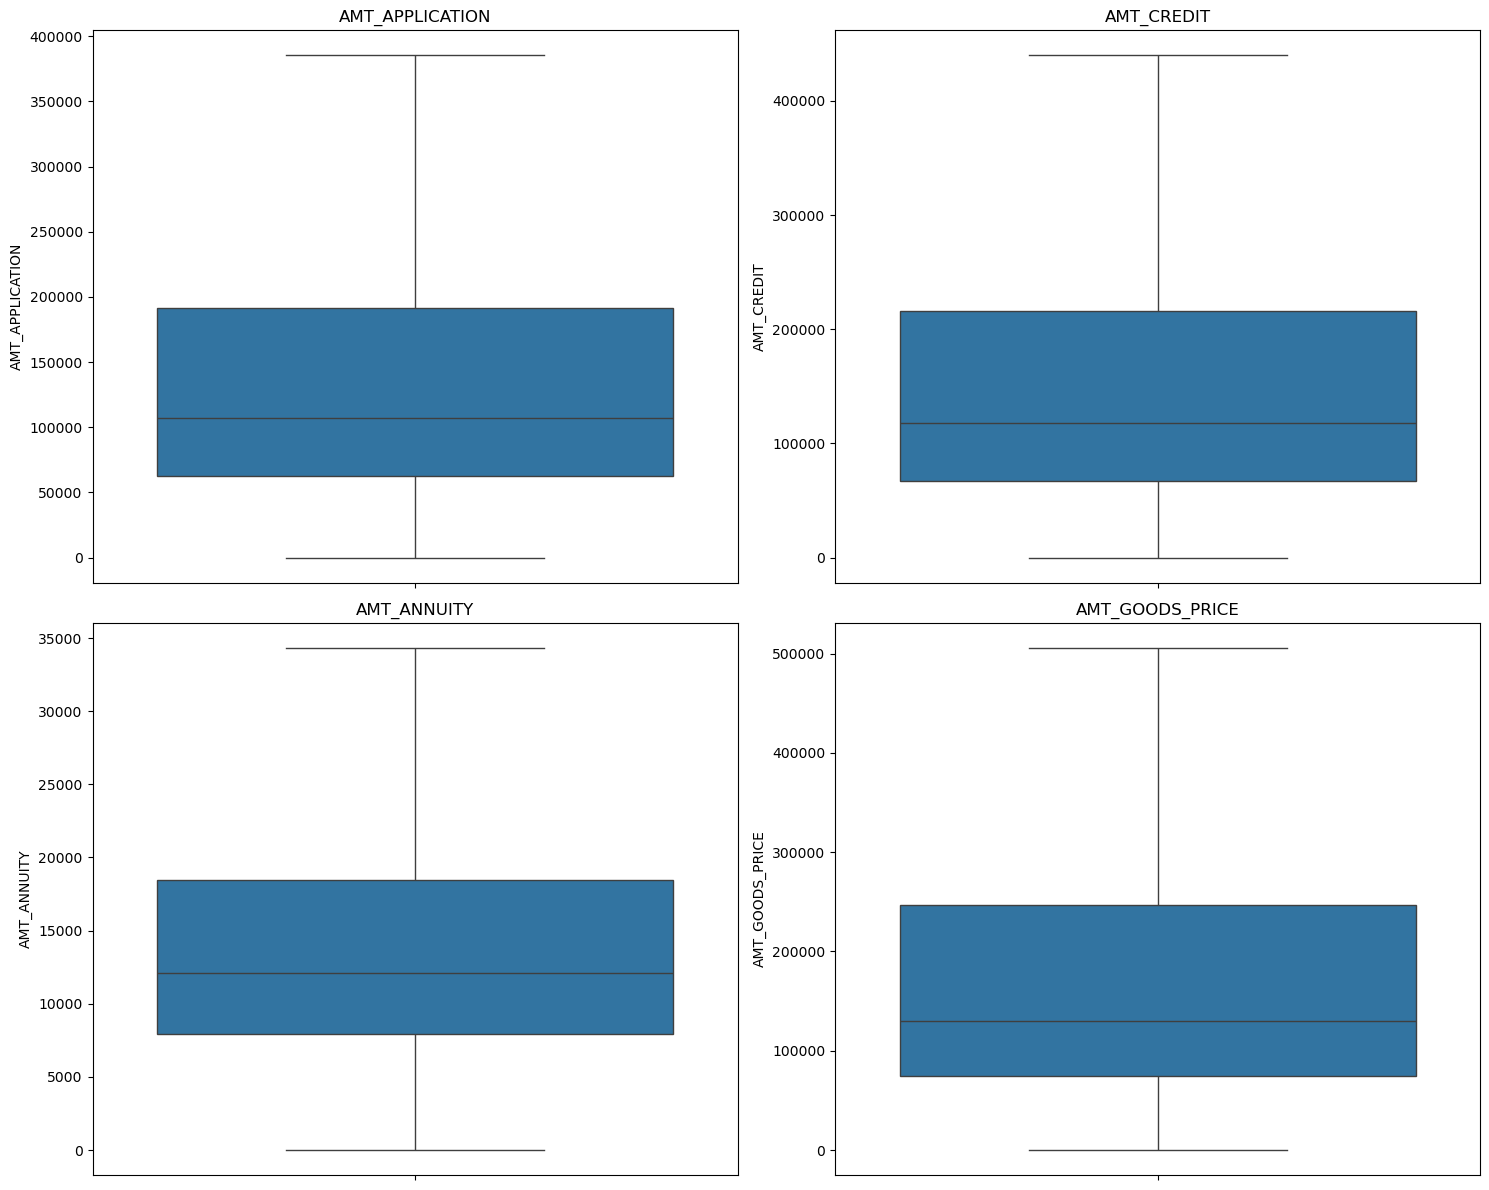

In [100]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.boxplot(y=prev_app["AMT_APPLICATION"])
plt.title("AMT_APPLICATION")

plt.subplot(2,2,2)
sns.boxplot(y=prev_app["AMT_CREDIT"])
plt.title("AMT_CREDIT")


plt.subplot(2,2,3)
sns.boxplot(y=prev_app["AMT_ANNUITY"])
plt.title("AMT_ANNUITY")


plt.subplot(2,2,4)
sns.boxplot(y=prev_app["AMT_GOODS_PRICE"])
plt.title("AMT_GOODS_PRICE")




plt.tight_layout()
plt.show()

### Handling Outliers

In [101]:
## Handling Outliers by capping
cols=["AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE","AMT_APPLICATION"]
for col in cols:
        Q1 = prev_app[col].quantile(0.25)
        Q3 = prev_app[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        
        # Clip outliers using pandas clip()
        prev_app[col] = prev_app[col].clip(lower=lower, upper=upper)

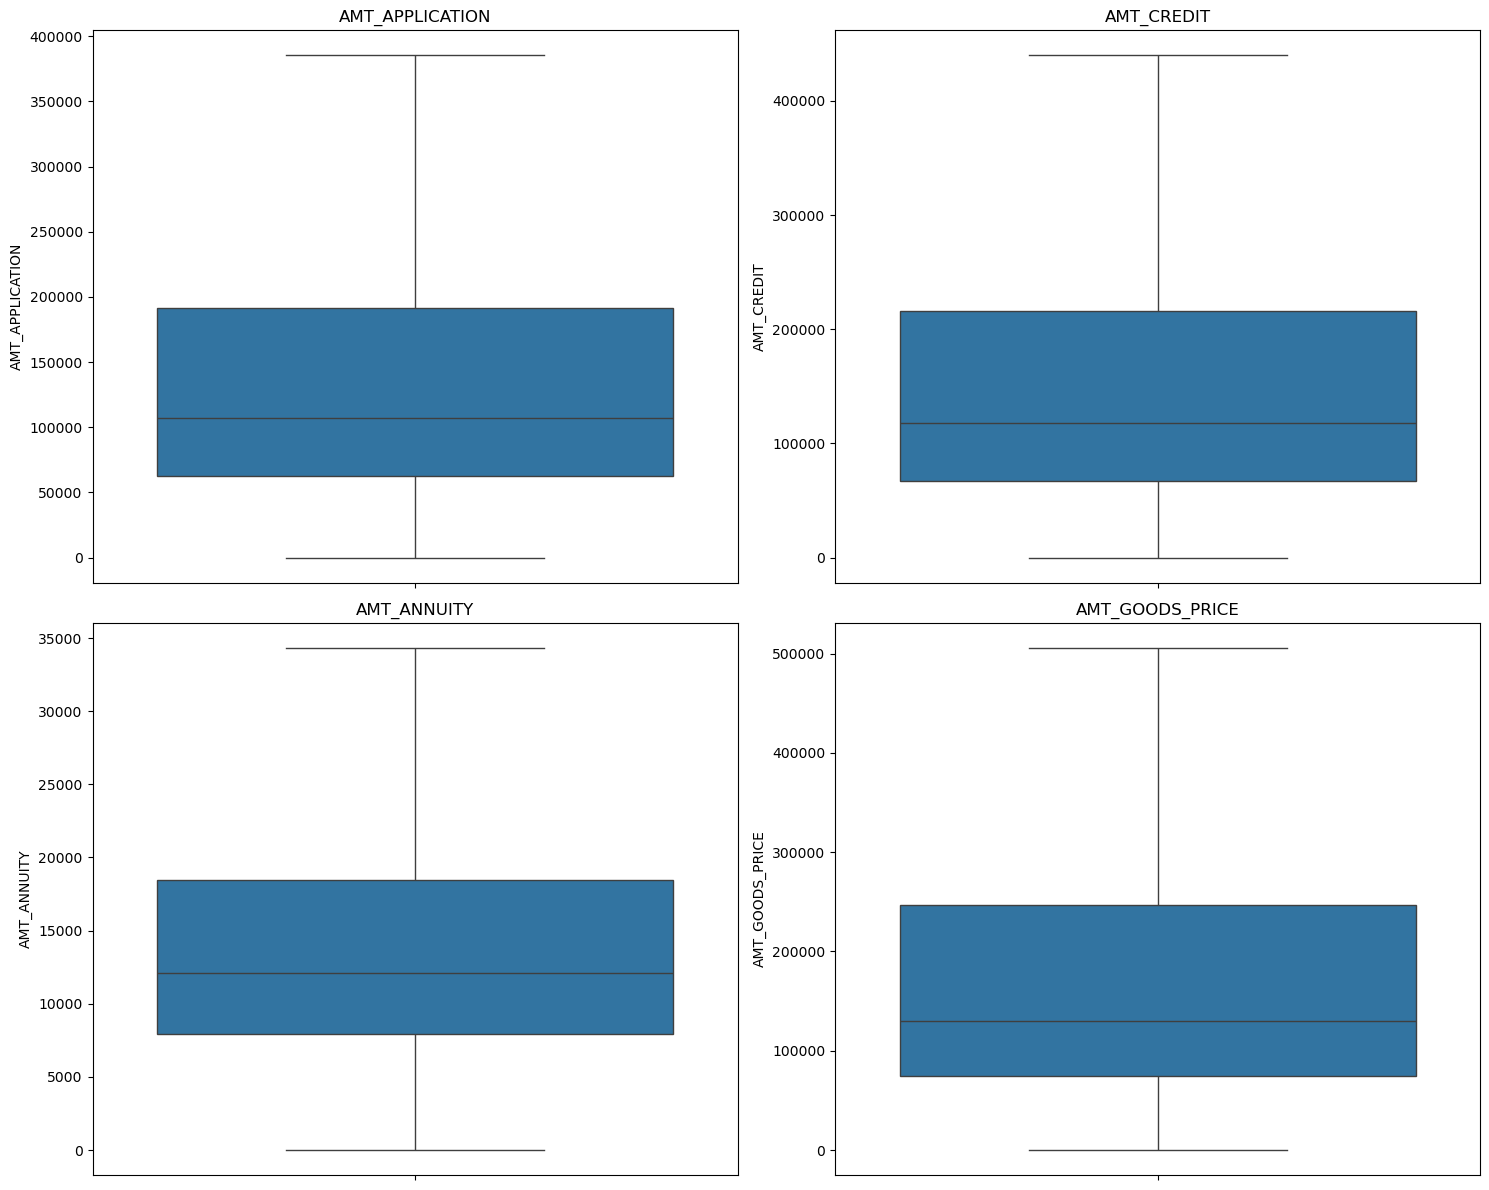

In [102]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.boxplot(y=prev_app["AMT_APPLICATION"])
plt.title("AMT_APPLICATION")

plt.subplot(2,2,2)
sns.boxplot(y=prev_app["AMT_CREDIT"])
plt.title("AMT_CREDIT")


plt.subplot(2,2,3)
sns.boxplot(y=prev_app["AMT_ANNUITY"])
plt.title("AMT_ANNUITY")


plt.subplot(2,2,4)
sns.boxplot(y=prev_app["AMT_GOODS_PRICE"])
plt.title("AMT_GOODS_PRICE")


plt.tight_layout()
plt.show()

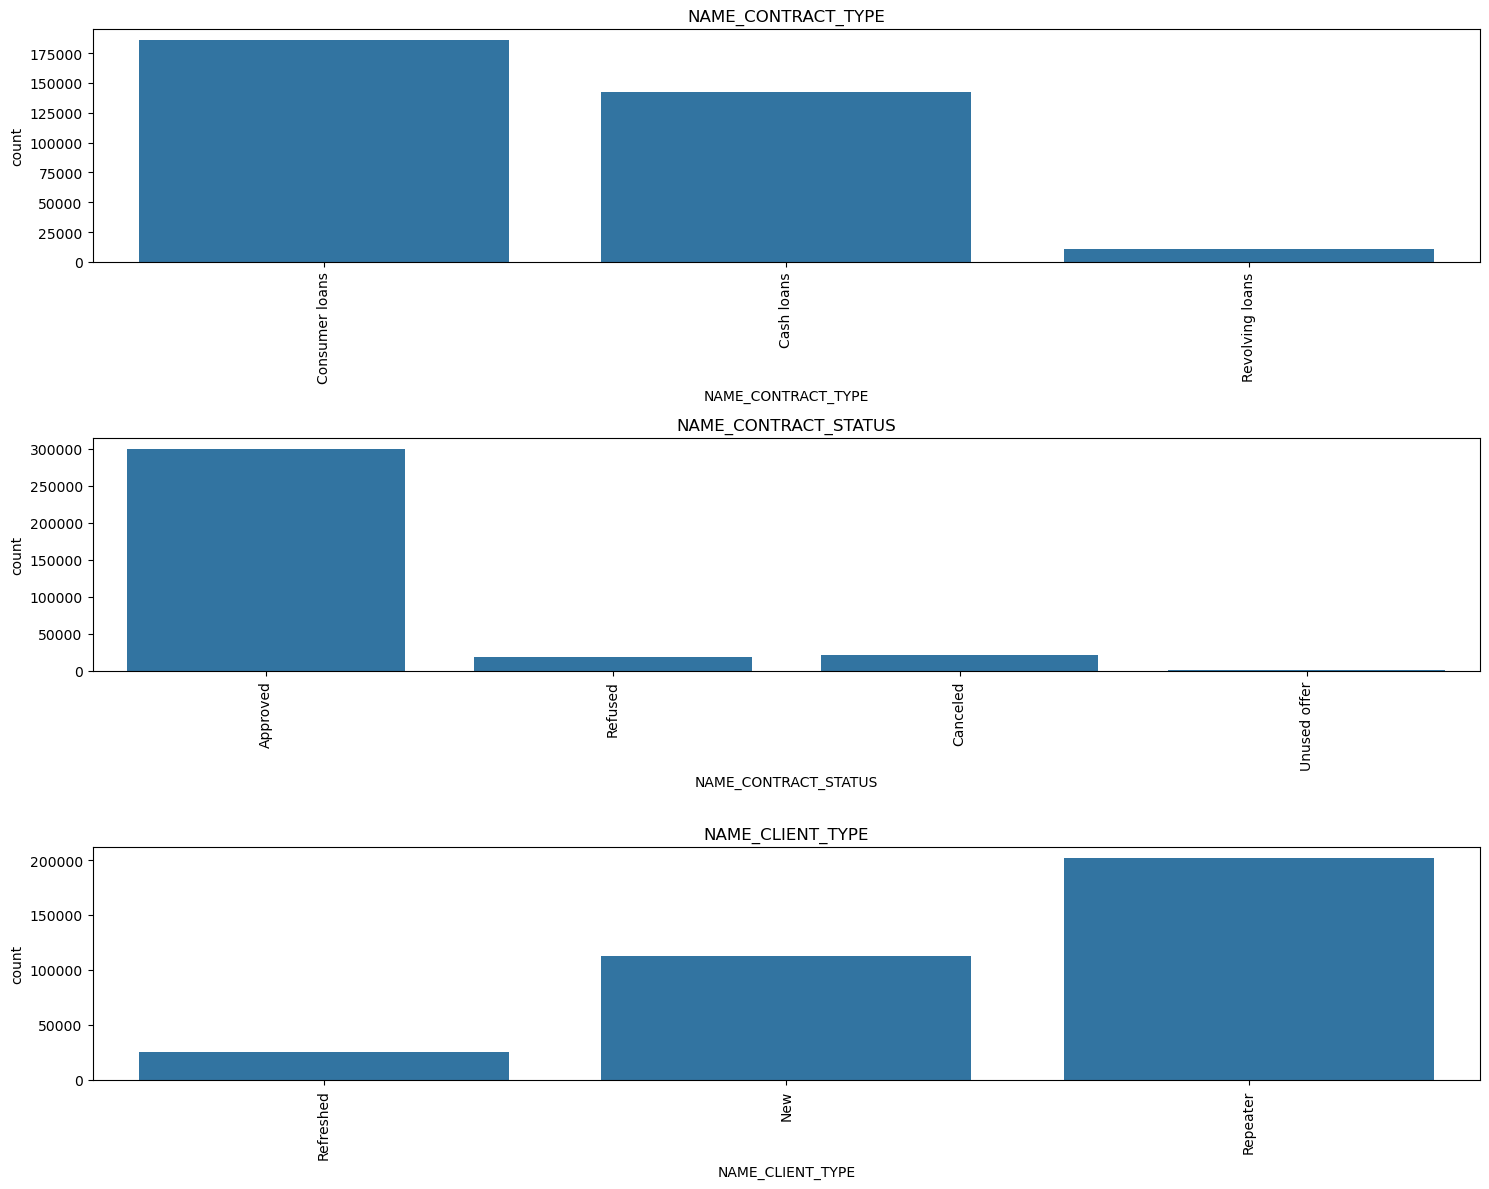

In [106]:
plt.figure(figsize=(15,12))

plt.subplot(3,1,1)
sns.countplot(x="NAME_CONTRACT_TYPE", data=prev_app)
plt.title("NAME_CONTRACT_TYPE")
plt.xticks(rotation=90)   # rotate labels 45 degrees


plt.subplot(3,1,2)
sns.countplot(x="NAME_CONTRACT_STATUS", data=prev_app)
plt.title("NAME_CONTRACT_STATUS")
plt.xticks(rotation=90)   # rotate labels 45 degrees



plt.subplot(3,1,3)
sns.countplot(x="NAME_CLIENT_TYPE", data=prev_app)
plt.title("NAME_CLIENT_TYPE")
plt.xticks(rotation=90)   # rotate labels 45 degrees



plt.xticks(rotation=90)   # rotate labels 90 degrees
plt.tight_layout()
plt.show()

##### Most of the previous applicants had applied for Consumer loans
##### Most of the previous applicants were Repeaters

### Bivariate Ananlysis

In [135]:
correlation=prev_app.corr(numeric_only=True)
corr_abs = correlation.abs()
corr_pairs = (
    corr_abs.unstack()
    .sort_values(key=abs, ascending=False)
    .drop_duplicates()
)

corr_pairs.head(10)

SK_ID_PREV       SK_ID_PREV         1.000000
AMT_APPLICATION  AMT_GOODS_PRICE    0.999884
AMT_GOODS_PRICE  AMT_CREDIT         0.993087
AMT_CREDIT       AMT_APPLICATION    0.975824
AMT_ANNUITY      AMT_GOODS_PRICE    0.820895
AMT_CREDIT       AMT_ANNUITY        0.816429
AMT_ANNUITY      AMT_APPLICATION    0.808872
CNT_PAYMENT      AMT_APPLICATION    0.680630
AMT_CREDIT       CNT_PAYMENT        0.674278
CNT_PAYMENT      AMT_GOODS_PRICE    0.672129
dtype: float64

<Axes: >

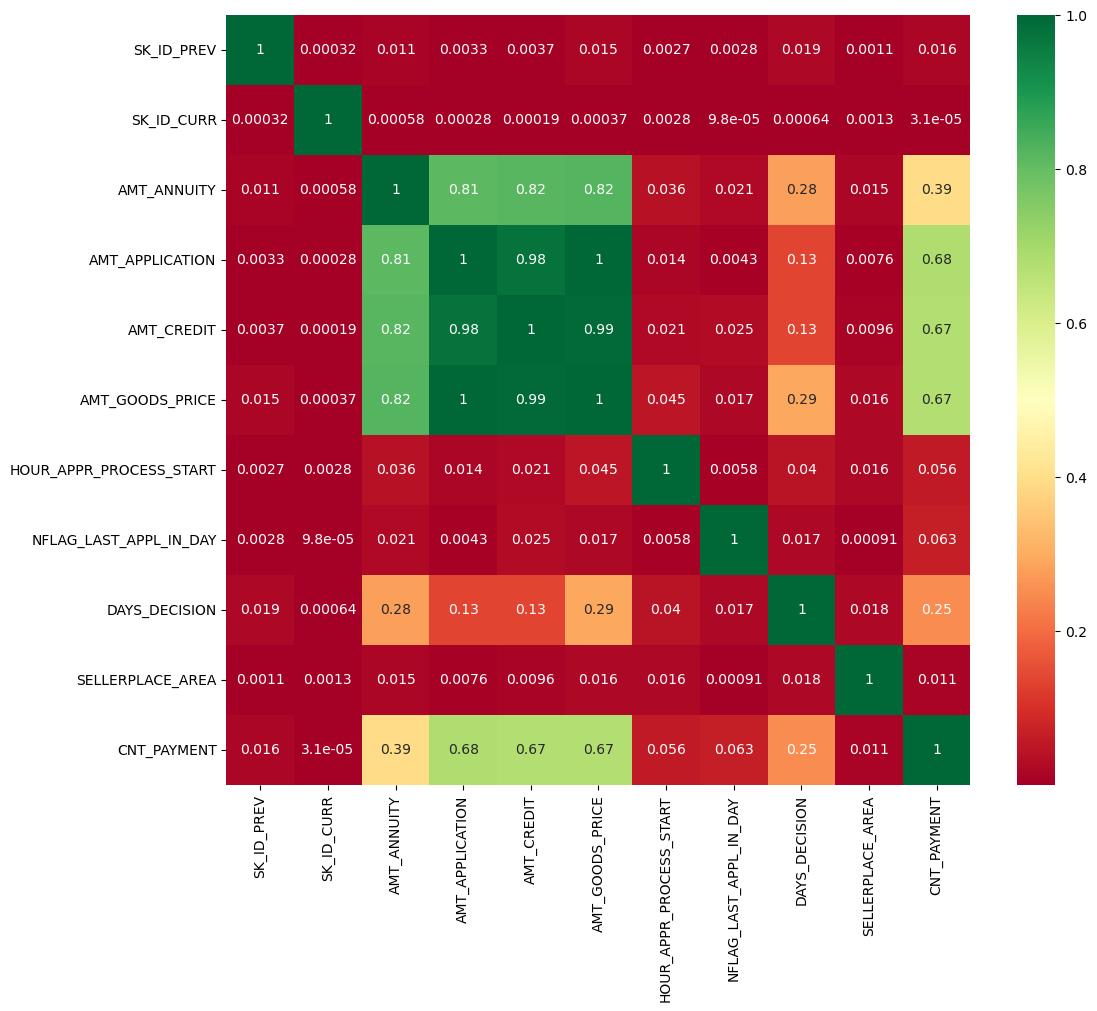

In [139]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_abs, cmap="RdYlGn", annot= True)

## Merging the dataframs application_data amd previous_application

In [107]:
merged=pd.merge(app,prev_app, how="left", on="SK_ID_CURR")

In [108]:
merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,CNT_PAYMENT,NAME_CONTRACT_TYPE_y,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,0,1,0,1.0,2,Business Entity Type 3,0.262949,0.139376,1,0,0,26,1.0,10.0,5,9251.0,179055.0,179055.0,179055.0,24.0,Consumer loans,Approved,New
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,0,1,0,2.0,1,School,0.622246,0.535276,1,0,0,46,3.0,3.0,0,34323.0,385337.0,439906.0,435436.0,10.0,Consumer loans,Approved,Refreshed
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,0,1.0,2,Government,0.555912,0.729567,0,0,0,52,0.0,11.0,7,5357.0,24282.0,20106.0,24282.0,4.0,Consumer loans,Approved,New
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,0,0,0,2.0,2,Business Entity Type 3,0.650442,0.535276,1,0,0,52,8.0,27.0,6,23651.0,272203.0,291695.0,408304.0,23.0,Cash loans,Approved,Repeater
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,0,0,0,1.0,2,Religion,0.322738,0.535276,0,0,1,55,8.0,11.0,9,12278.0,150530.0,166638.0,150530.0,20.0,Cash loans,Approved,Repeater


In [109]:
merged.shape

(307511, 41)

In [110]:
target0=merged[merged["TARGET"]==0]

In [111]:
target1=merged[merged["TARGET"]==1]

In [112]:
target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,CNT_PAYMENT,NAME_CONTRACT_TYPE_y,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,0,1,0,2.0,1,School,0.622246,0.535276,1,0,0,46,3.0,3.0,0,34323.0,385337.0,439906.0,435436.0,10.0,Consumer loans,Approved,Refreshed
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,0,1.0,2,Government,0.555912,0.729567,0,0,0,52,0.0,11.0,7,5357.0,24282.0,20106.0,24282.0,4.0,Consumer loans,Approved,New
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,0,0,0,2.0,2,Business Entity Type 3,0.650442,0.535276,1,0,0,52,8.0,27.0,6,23651.0,272203.0,291695.0,408304.0,23.0,Cash loans,Approved,Repeater
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,0,0,0,1.0,2,Religion,0.322738,0.535276,0,0,1,55,8.0,11.0,9,12278.0,150530.0,166638.0,150530.0,20.0,Cash loans,Approved,Repeater
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,1,1,1,0,2.0,2,Other,0.354225,0.621226,1,0,0,47,4.0,13.0,1,15839.0,155701.0,162767.0,194627.0,14.0,Consumer loans,Approved,Repeater


## Exploratory Data Analysis

### Univariate Analysis

In [151]:
num_cols = merged.select_dtypes(include="number").columns
print(num_cols)

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'REGION_POPULATION_RELATIVE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_8', 'YEARS_BIRTH', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'AMT_ANNUITY_y',
       'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'CNT_PAYMENT'],
      dtype='object')


In [159]:
num_cols= [ 'CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'REGION_POPULATION_RELATIVE',  'CNT_FAM_MEMBERS', 
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BIRTH', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'AMT_ANNUITY_y',
       'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'CNT_PAYMENT']

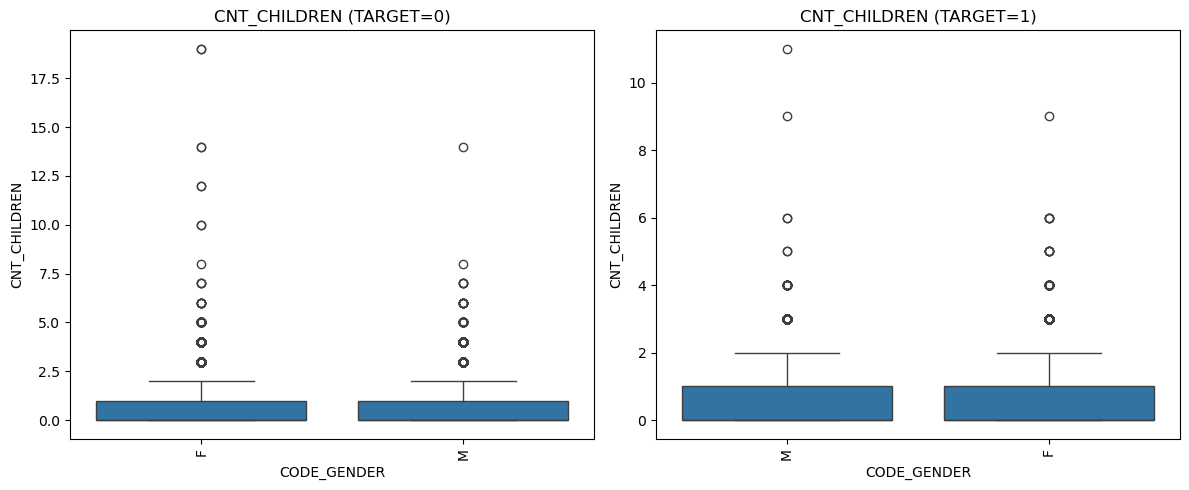

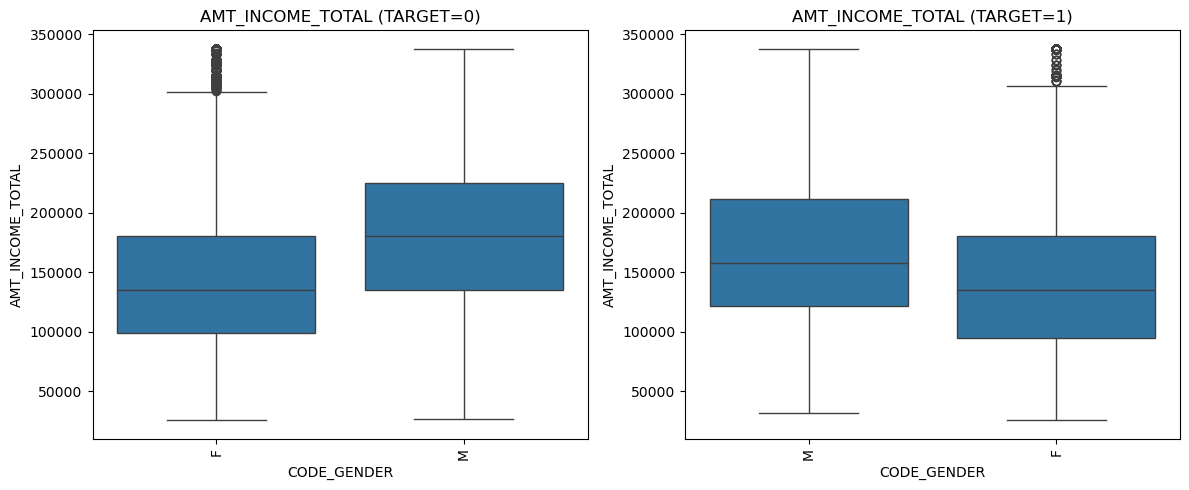

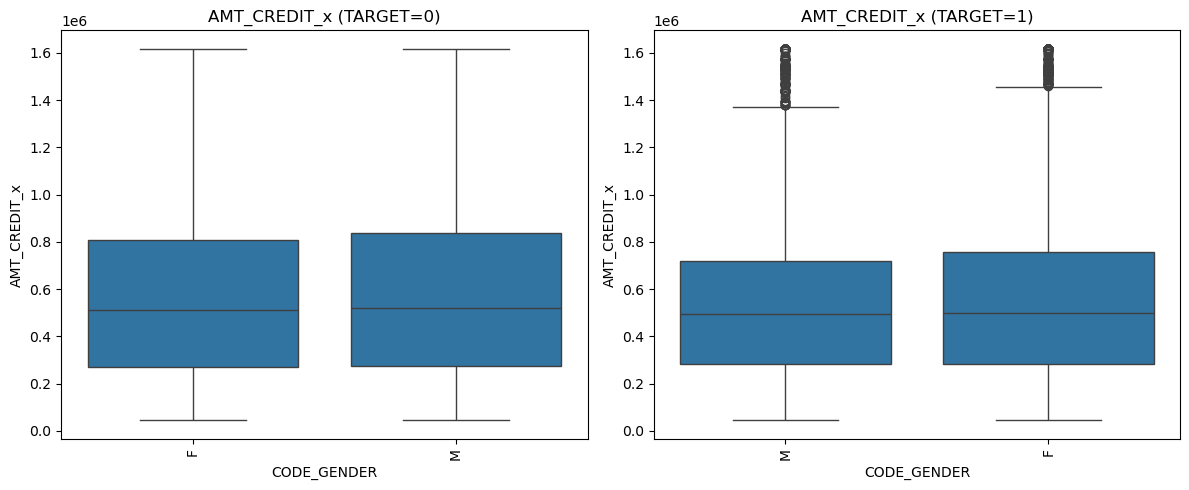

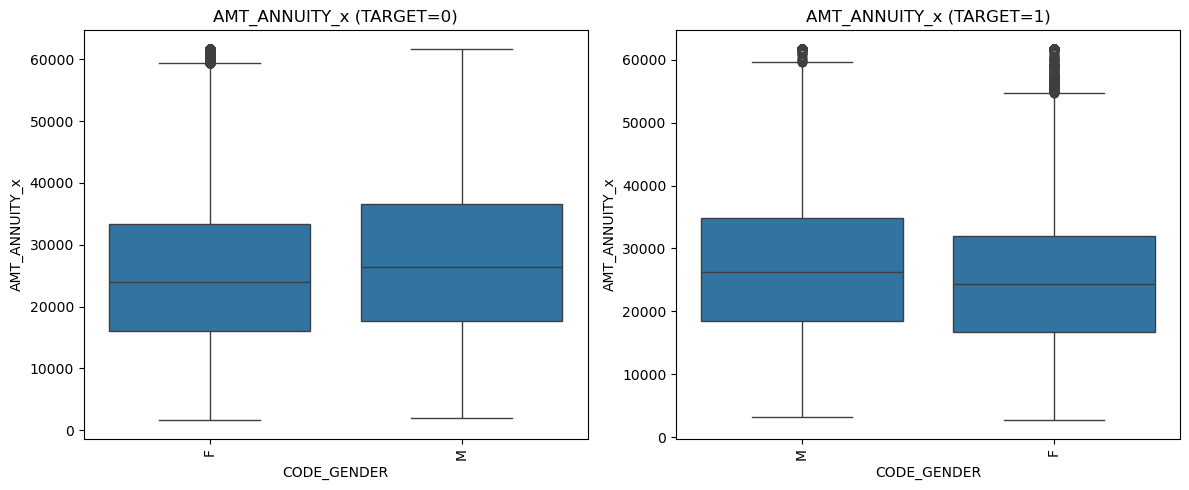

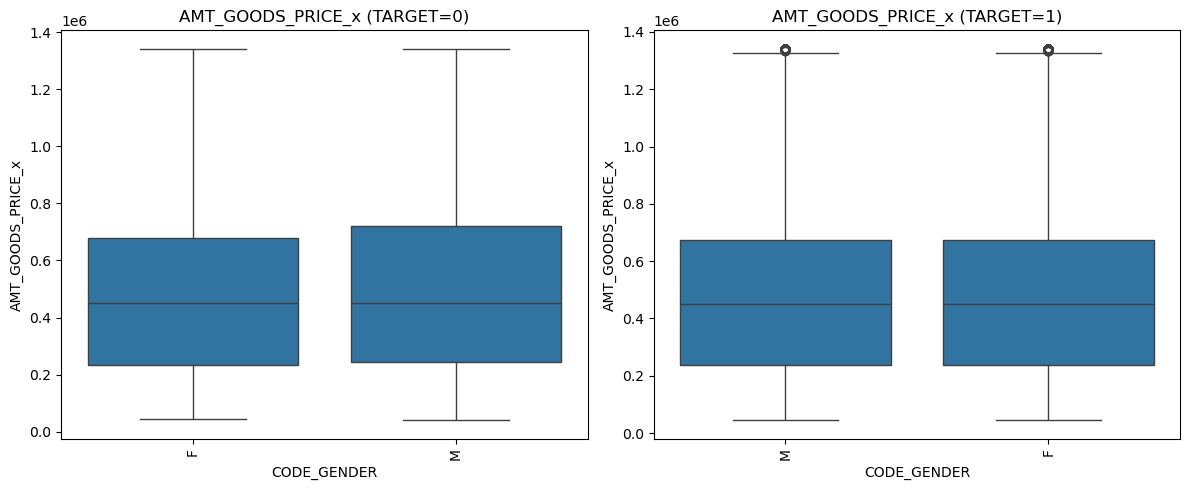

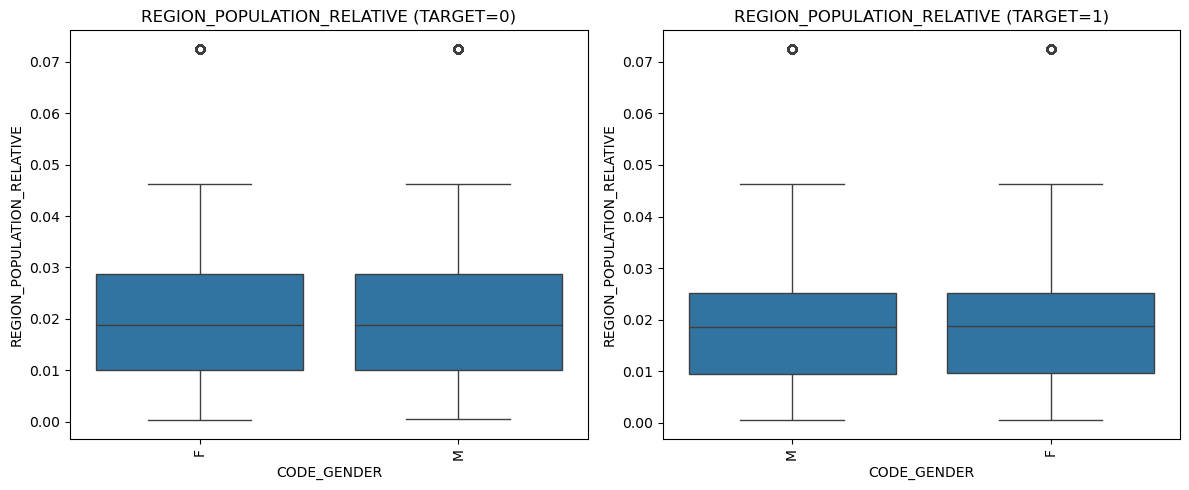

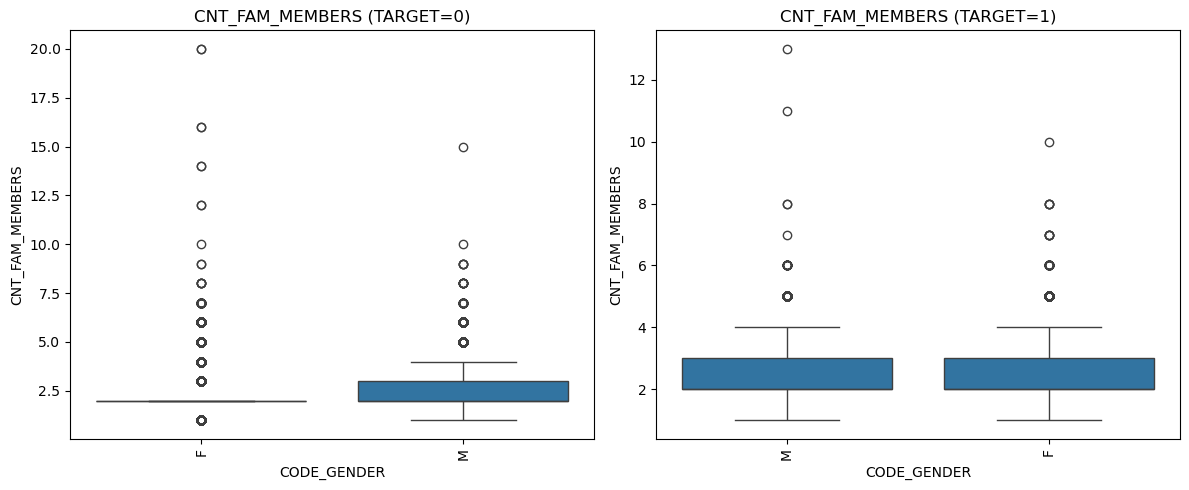

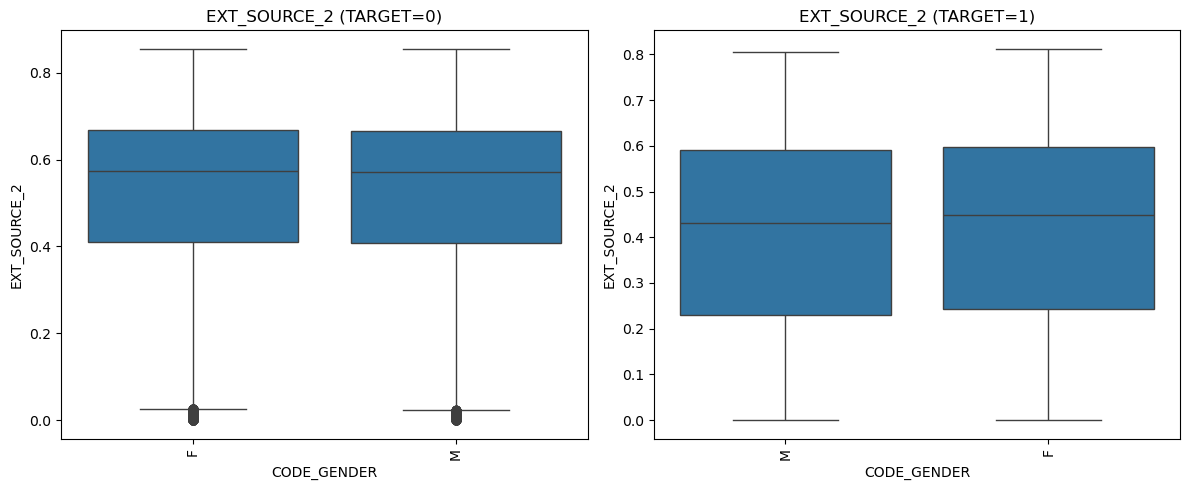

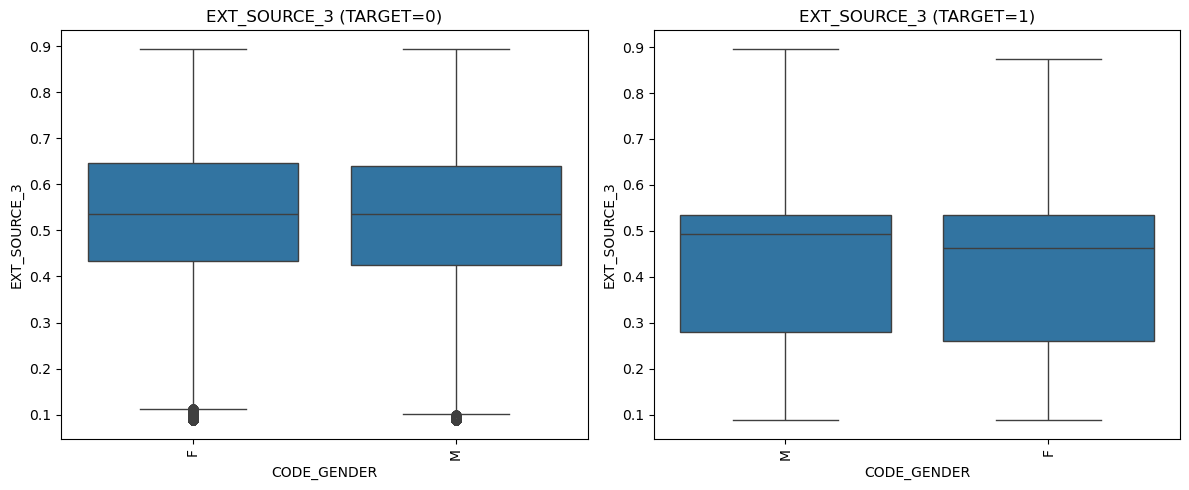

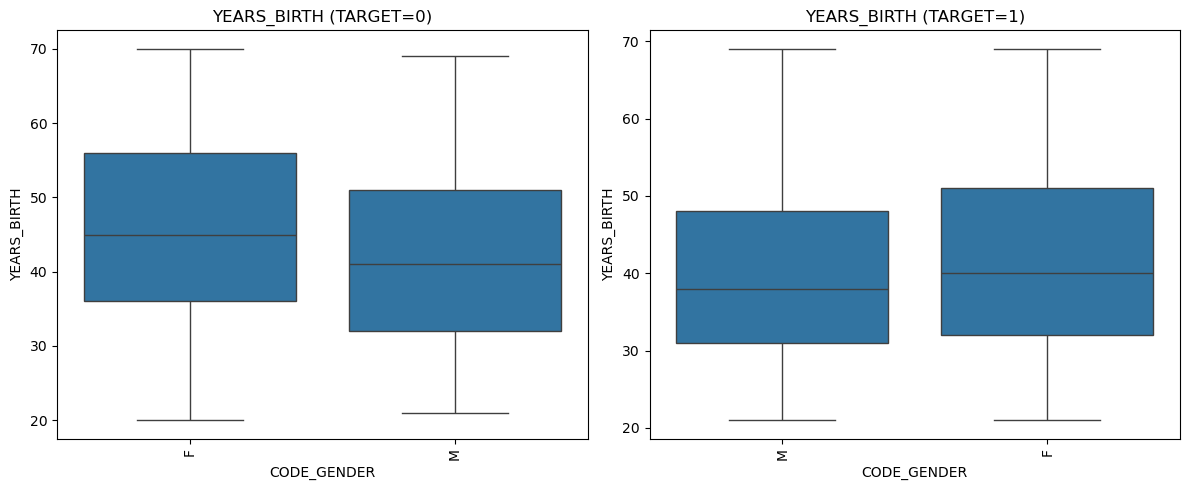

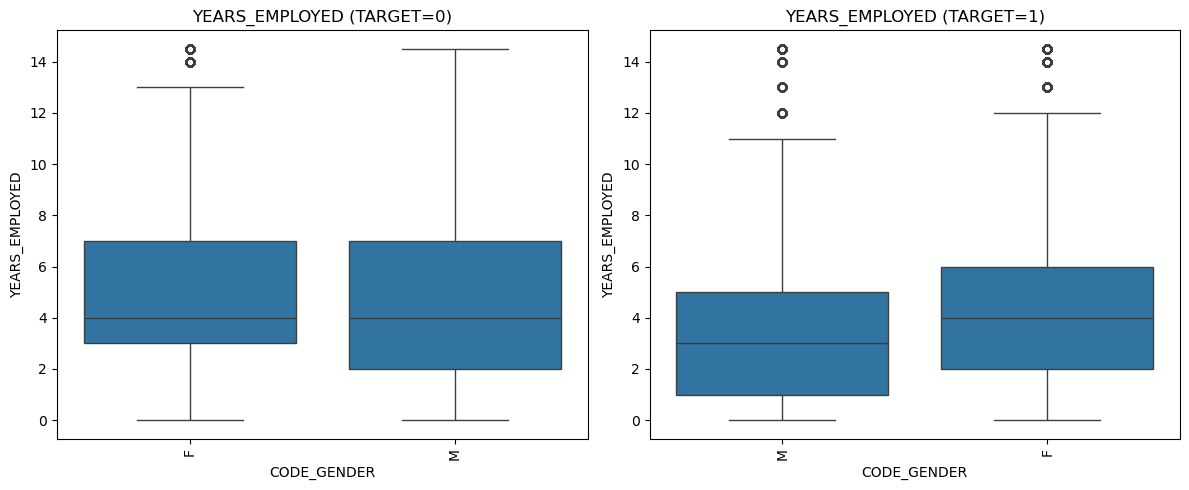

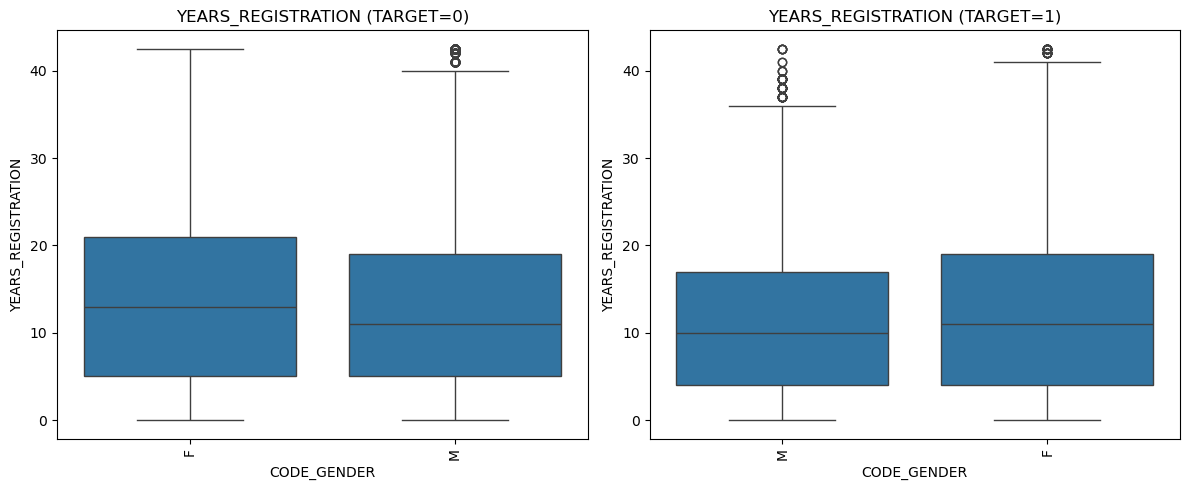

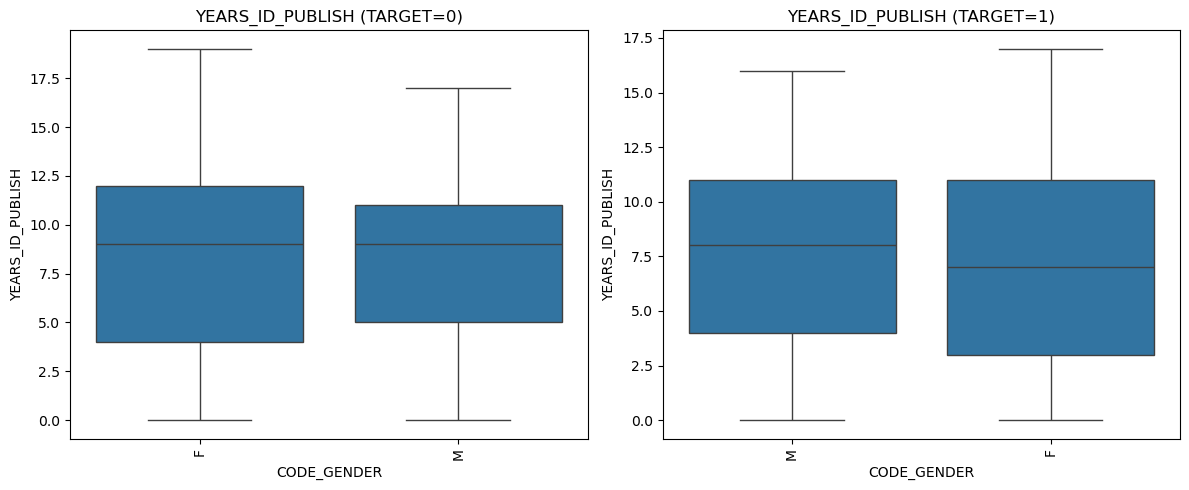

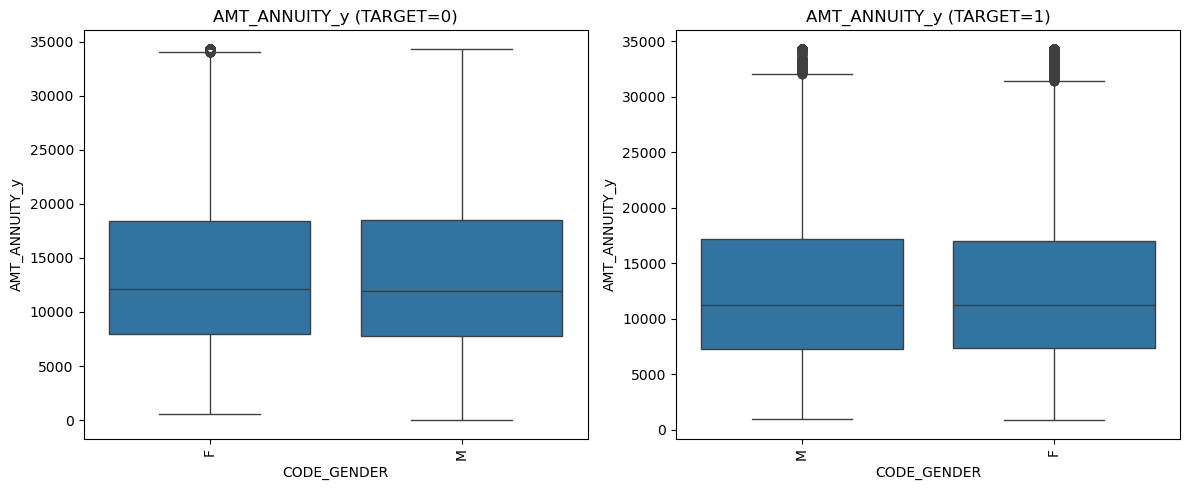

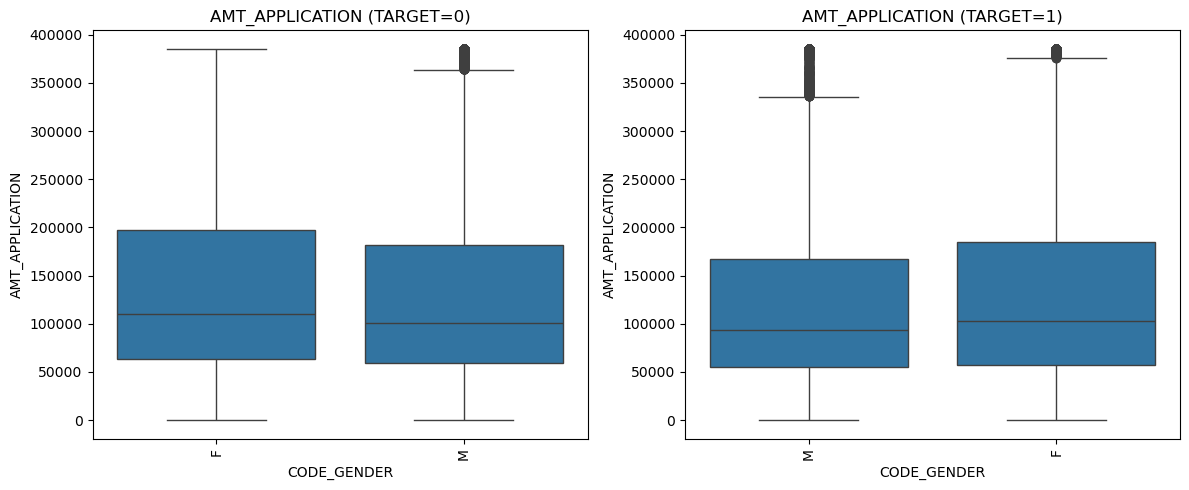

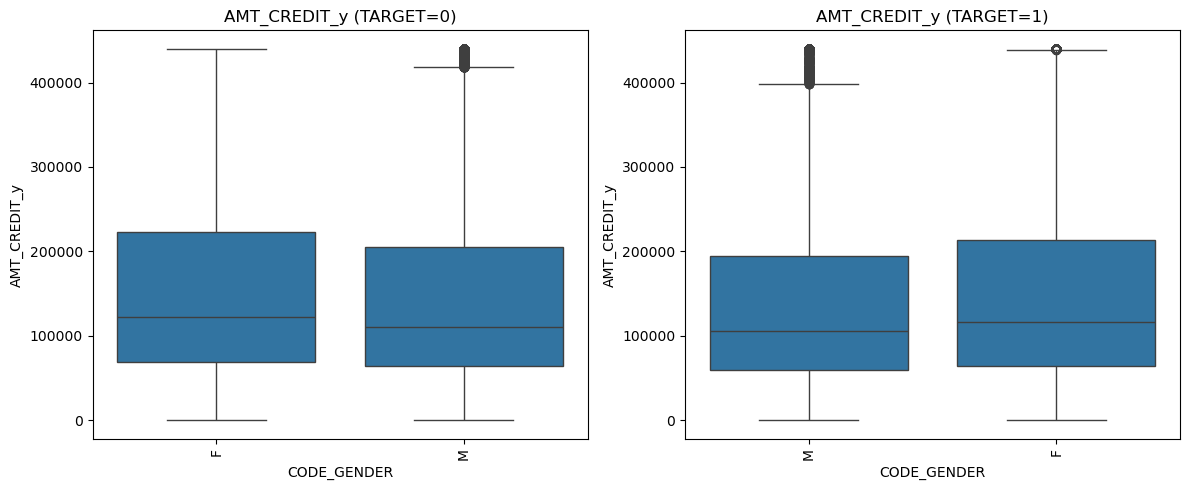

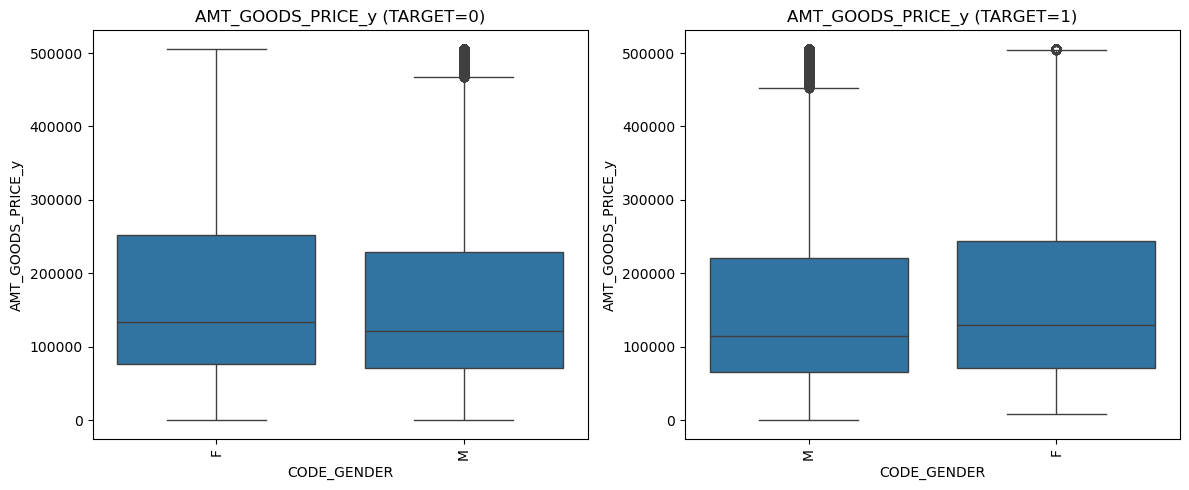

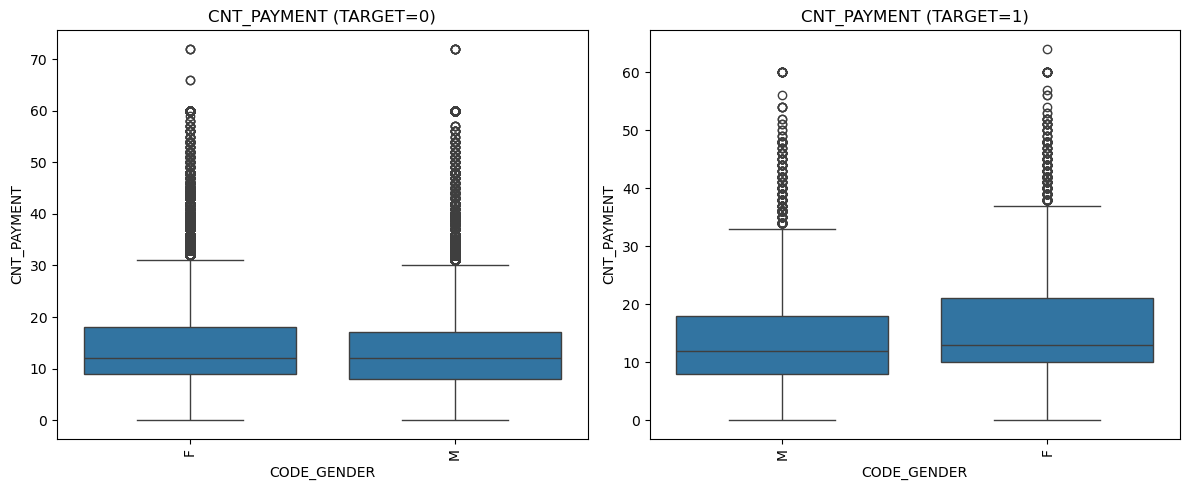

In [160]:
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.boxplot(y=target0[col], x=target0["CODE_GENDER"], ax=axes[0])
    axes[0].tick_params(axis="x", rotation=90)
    axes[0].set_title(f"{col} (TARGET=0)")

    sns.boxplot(y=target1[col], x=target1["CODE_GENDER"], ax=axes[1])
    axes[1].tick_params(axis="x", rotation=90)
    axes[1].set_title(f"{col} (TARGET=1)")

    plt.tight_layout()
    plt.show()


##### Defaulters have a lower EXT_SOURCE_2 and EXT_SOURCE_3 scores than non-defaulters
##### Male applicants have higher AMT_INCOME_TOTAL than female applicants in both the cases

In [114]:
cat_var=["NAME_CONTRACT_TYPE_x", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "ORGANIZATION_TYPE", "NAME_CONTRACT_TYPE_y", "NAME_CONTRACT_STATUS", "NAME_CLIENT_TYPE"]

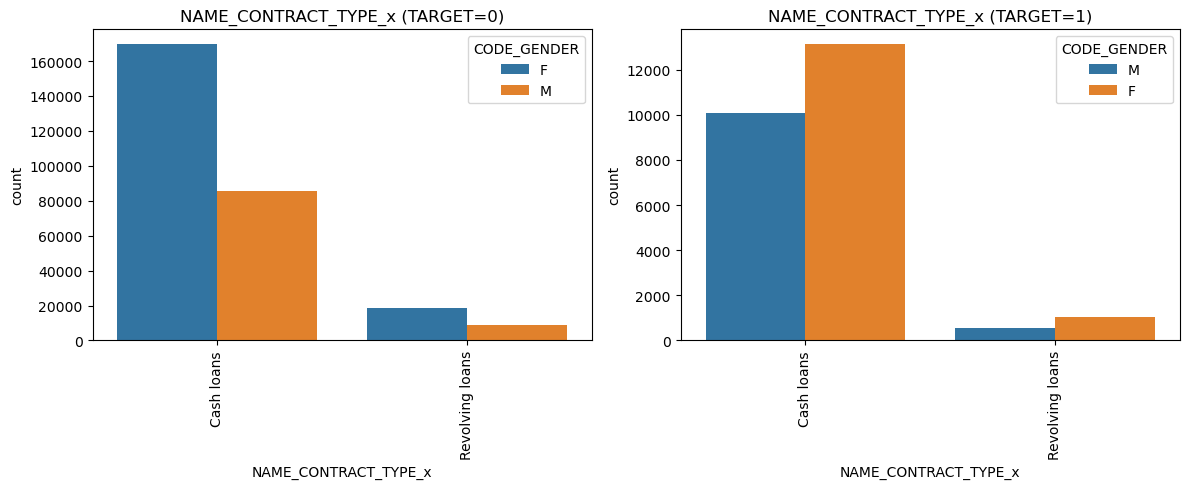

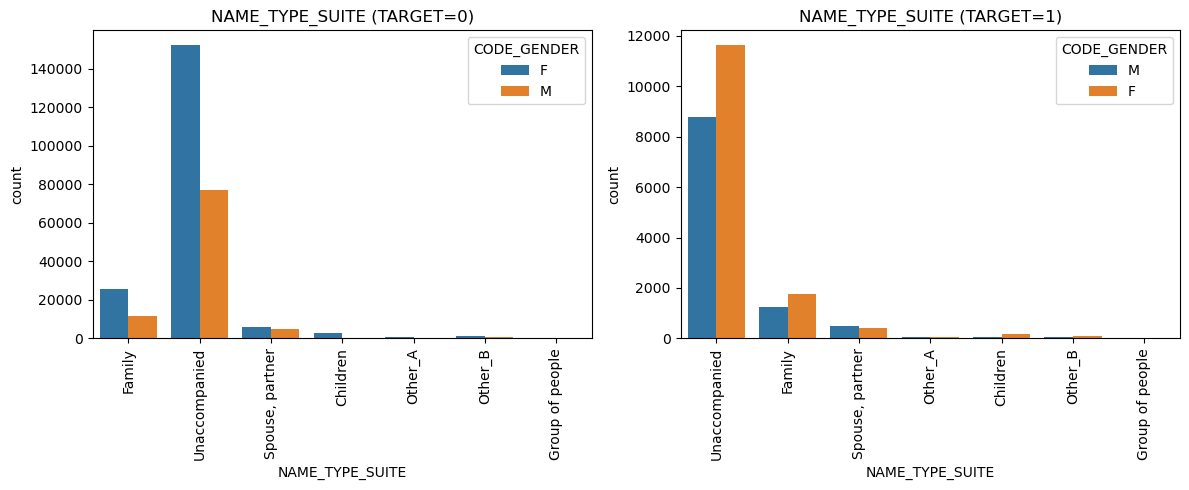

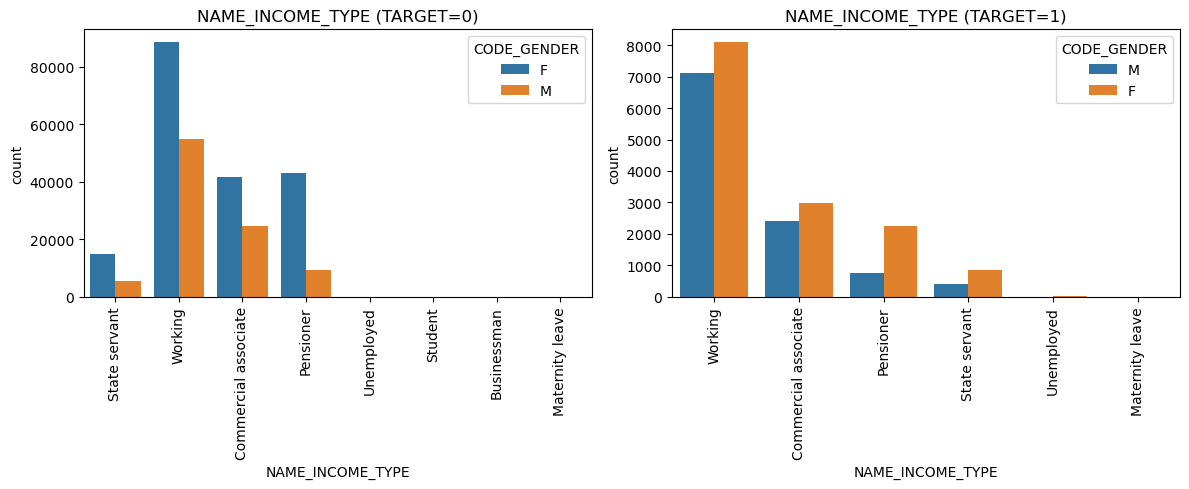

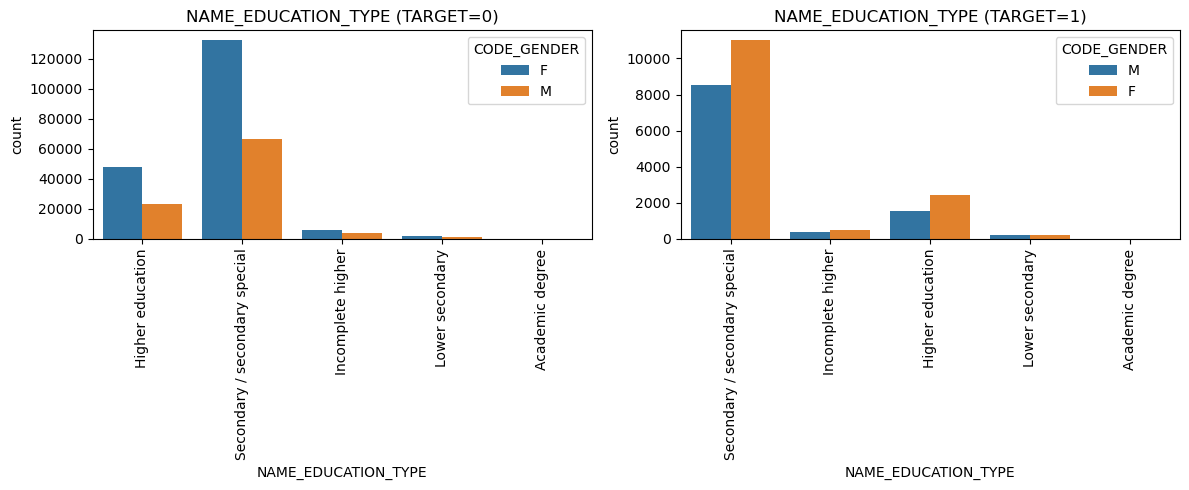

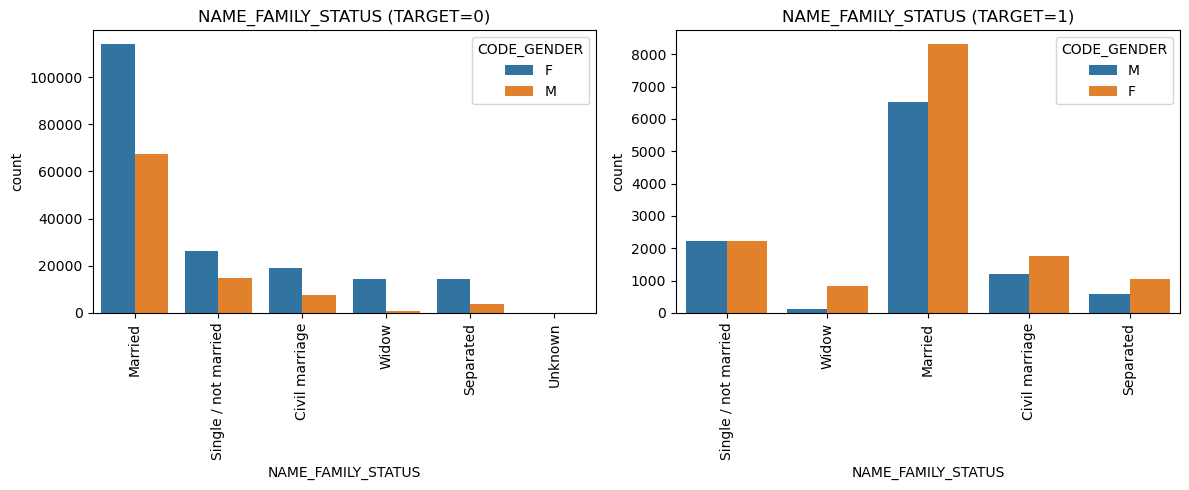

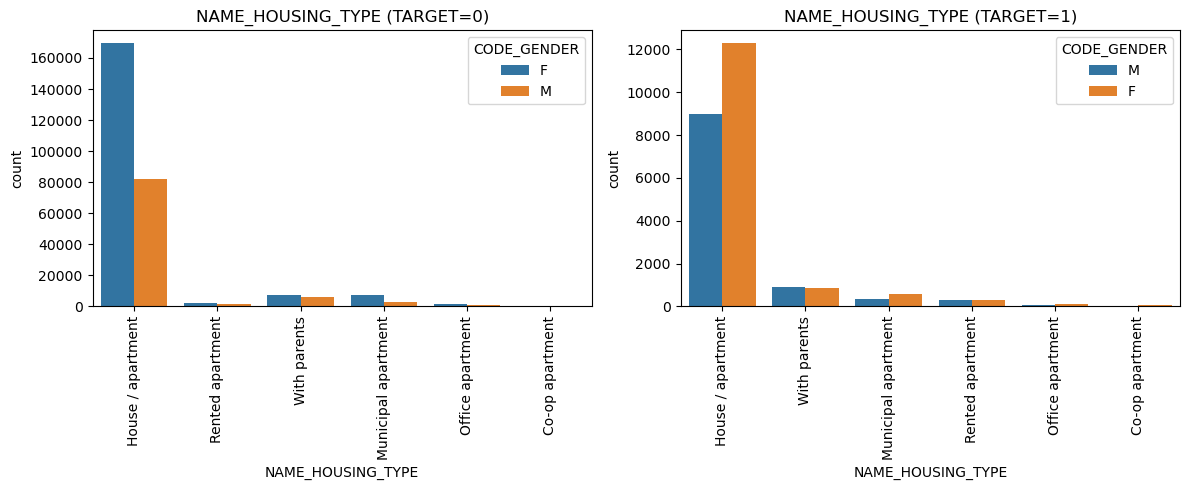

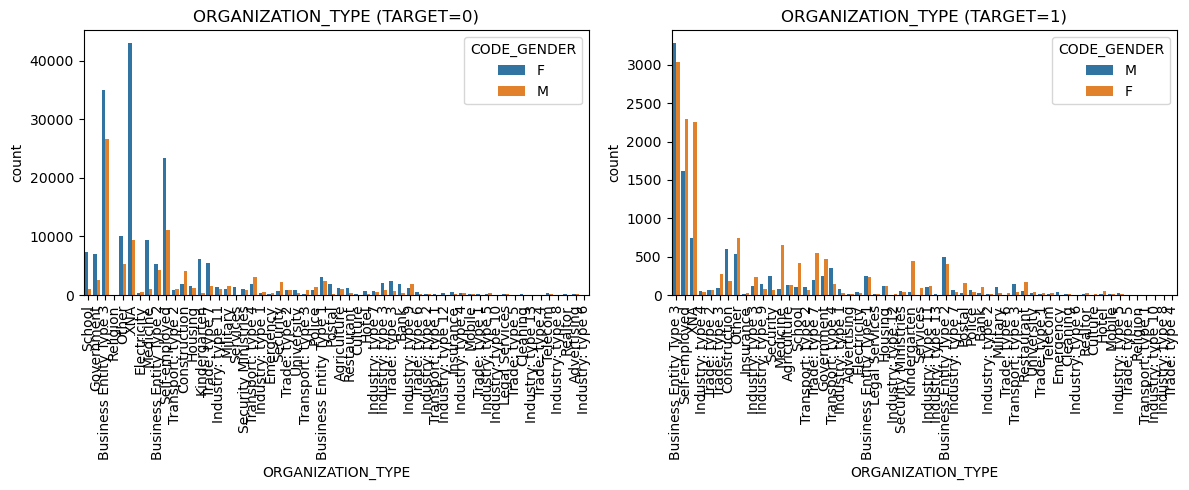

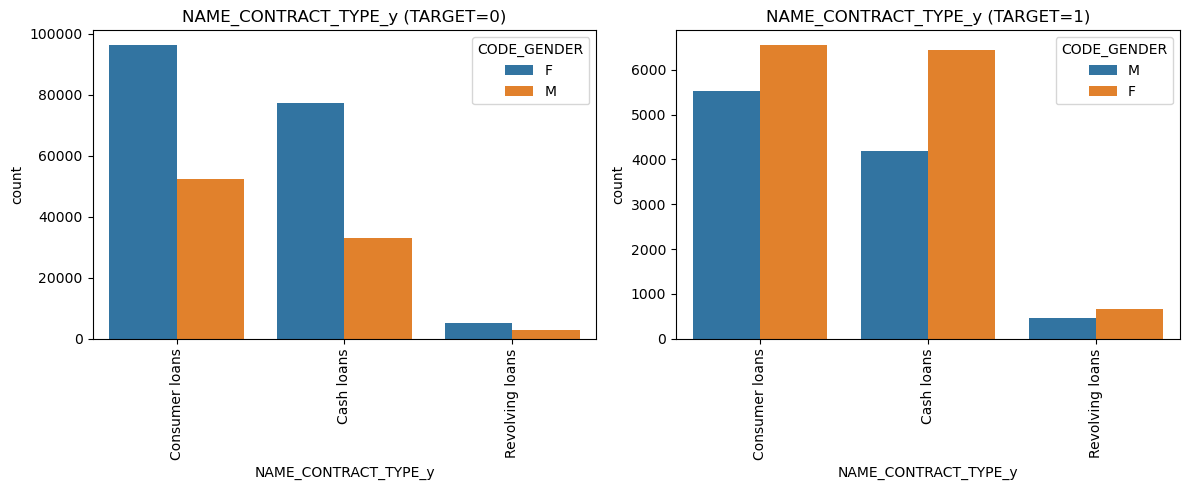

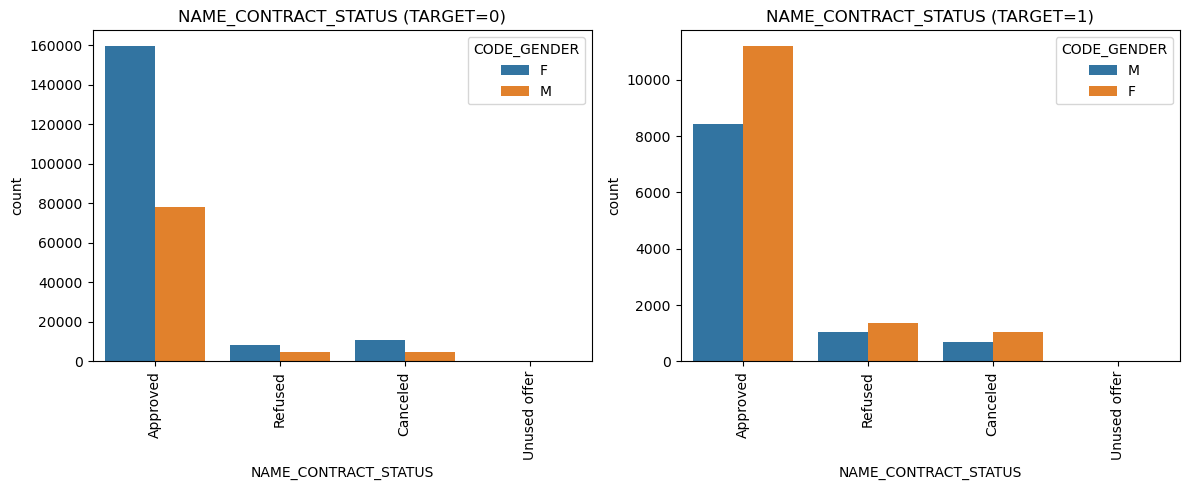

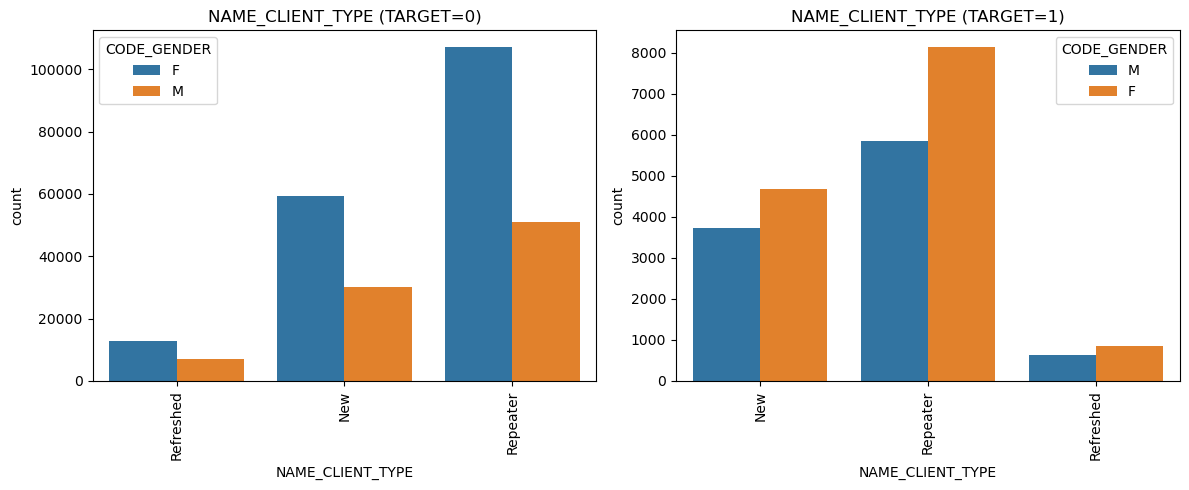

In [161]:
for col in cat_var:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.countplot(x=col, data=target0, hue="CODE_GENDER", ax=axes[0])
    axes[0].tick_params(axis="x", rotation=90)
    axes[0].set_title(f"{col} (TARGET=0)")

    sns.countplot(x=col, data=target1, hue="CODE_GENDER", ax=axes[1])
    axes[1].tick_params(axis="x", rotation=90)
    axes[1].set_title(f"{col} (TARGET=1)")

    plt.tight_layout()

    


##### More Female applicants have applied for Cash and revolving loans than Male applicants.
##### In defaulters, most of the clients came unaccompanied.
##### Most of the defaulters are Working professionals in which most are females.
##### Most of the candidates have applied for consumer and cash loans


#### Pivot tables

In [163]:
merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,CNT_PAYMENT,NAME_CONTRACT_TYPE_y,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,0,1,0,1.0,2,Business Entity Type 3,0.262949,0.139376,1,0,0,26,1.0,10.0,5,9251.0,179055.0,179055.0,179055.0,24.0,Consumer loans,Approved,New
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,0,1,0,2.0,1,School,0.622246,0.535276,1,0,0,46,3.0,3.0,0,34323.0,385337.0,439906.0,435436.0,10.0,Consumer loans,Approved,Refreshed
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,0,1.0,2,Government,0.555912,0.729567,0,0,0,52,0.0,11.0,7,5357.0,24282.0,20106.0,24282.0,4.0,Consumer loans,Approved,New
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,0,0,0,2.0,2,Business Entity Type 3,0.650442,0.535276,1,0,0,52,8.0,27.0,6,23651.0,272203.0,291695.0,408304.0,23.0,Cash loans,Approved,Repeater
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,0,0,0,1.0,2,Religion,0.322738,0.535276,0,0,1,55,8.0,11.0,9,12278.0,150530.0,166638.0,150530.0,20.0,Cash loans,Approved,Repeater


<Axes: xlabel='NAME_CONTRACT_STATUS'>

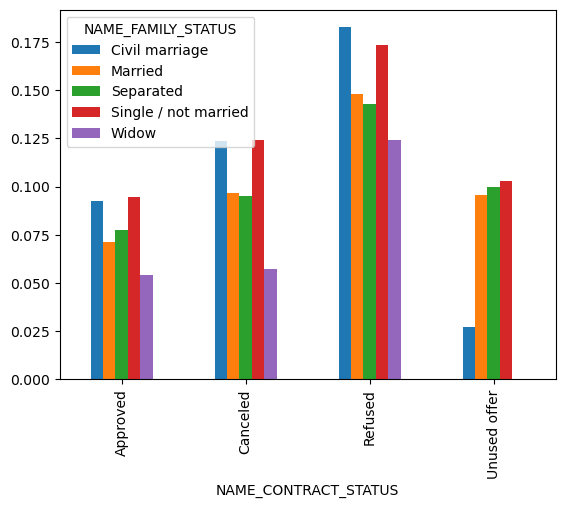

In [165]:
merged.pivot_table(index="NAME_CONTRACT_STATUS", columns="NAME_FAMILY_STATUS", values="TARGET", aggfunc="mean").plot.bar()

##### For clients with "Approved","Cancelled", "Refused" status, most of the defaulters had a civil marriage, followed by candidates who were single

<Axes: xlabel='NAME_CONTRACT_STATUS'>

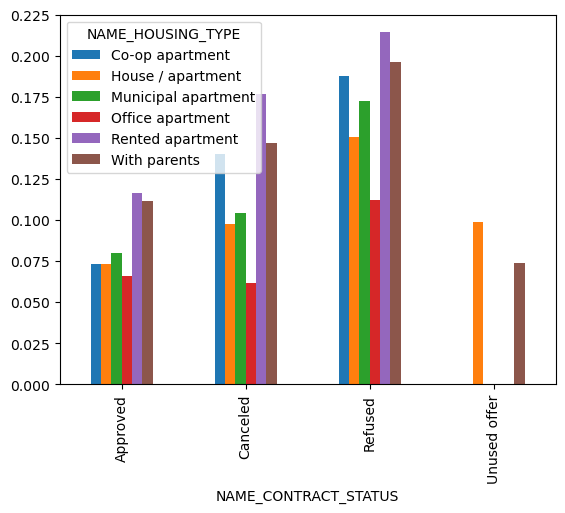

In [166]:
merged.pivot_table(index="NAME_CONTRACT_STATUS", columns="NAME_HOUSING_TYPE", values="TARGET", aggfunc="mean").plot.bar()

##### Most of the clients who defaulted had rented apartments, followed by those who lived with parents.


<Axes: xlabel='NAME_CONTRACT_STATUS'>

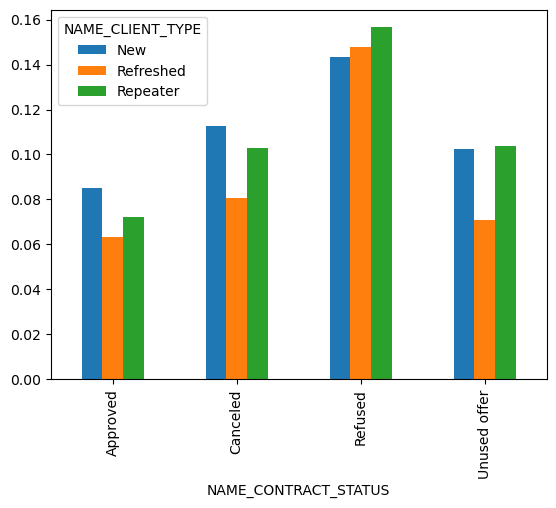

In [168]:
merged.pivot_table(index="NAME_CONTRACT_STATUS", columns="NAME_CLIENT_TYPE", values="TARGET", aggfunc="mean").plot.bar()

##### Among clients with Apporved, Canceled and Unused offer as previous losn satus, most of the defaulters were new clients
##### Among Clients with Refused status of previous loan, most of the deafulters were repeaters